# Import librairies 

In [1]:
import pandas as pd
import numpy as np
import re
import cleaning_functions
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\ploitploit\AppData\Local\Temp\ipykernel_11884\2872815356.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Load the dataset

In [2]:
#importing 4 dataset : 
# - the main dataset giving detailed informations on dark markets in 2014-2015
# - the other datasets giving several figures on dark markets in 2020-2021-2022-2023

df = pd.read_csv('../data/cleaned/cleaned_main_dataset_2014-2015.csv', encoding='ISO-8859-1')
df_2020 = pd.read_csv('../data/cleaned/2020.csv', encoding='ISO-8859-1')
df_2021 = pd.read_csv('../data/cleaned/2021.csv', encoding='ISO-8859-1')
df_2022 = pd.read_csv('../data/cleaned/2022.csv', encoding='ISO-8859-1')
df_2023 = pd.read_csv('../data/cleaned/2023.csv', encoding='ISO-8859-1')

# Analysis 
### 0/ Overview

In [3]:
df.head()

,vendor,category,item,item_description,price,origin,destination,rating,numeric_rating,rating_category,main_category,sub_category,2,3
0,cheappaytv,services/hacking,12 Month HuluPlus gift Code,12-Month HuluPlus Codes for $25. They are wort...,0.050270,NaN,NaN,4.96/5,4.96,positive,services,hacking,NaN,NaN
1,cheappaytv,services/hacking,Pay TV Sky UK Sky Germany HD TV and much mor...,Hi we offer a World Wide CCcam Service for En...,0.152420,NaN,NaN,4.96/5,4.96,positive,services,hacking,NaN,NaN
2,kryptykog,services/hacking,OFFICIAL Account Creator Extreme 4.2,Tagged Submission Fix Bebo Submission Fix Adju...,0.007000,NaN,NaN,4.93/5,4.93,positive,services,hacking,NaN,NaN
3,cyberzen,services/hacking,VPN > TOR > SOCK TUTORIAL,How to setup a VPN > TOR > SOCK super safe enc...,0.019017,NaN,NaN,4.89/5,4.89,positive,services,hacking,NaN,NaN
4,businessdude,services/hacking,Facebook hacking guide,. This guide will teach you how to hack Faceb...,0.062018,NaN,NaN,4.88/5,4.88,positive,services,hacking,NaN,NaN


In [4]:
df.shape

(109684, 14)

In [5]:
df.columns

Index(['vendor', 'category', 'item', 'item_description', 'price', 'origin',
       'destination', 'rating', 'numeric_rating', 'rating_category',
       'main_category', 'sub_category', '2', '3'],
      dtype='object')

### 1/ Category analysis

In [6]:
#Best-selling product category regarding the volume
#main_category

df_main = df['main_category'].value_counts().reset_index()

#################################################

df_main = df_main[df_main['count'] > 1]

#################################################

df_main.columns = ['main_category', 'count']

df_main

,main_category,count
0,drugs,93881
1,data,6132
2,services,4068
3,counterfeits,3420
4,weapons,656
5,electronics,599
6,tobacco,420
7,jewelry,418
8,chemicals,90


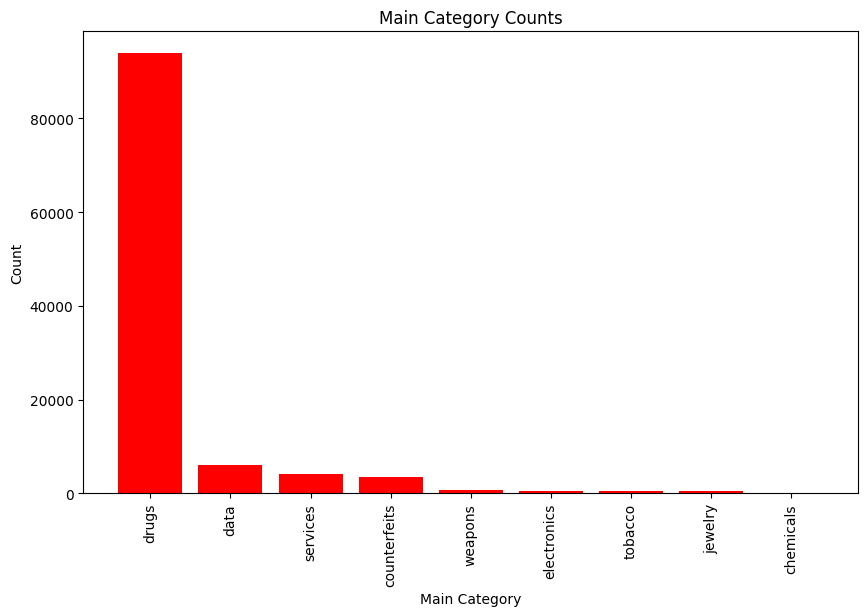

In [7]:
#Distribution of the main category
plt.figure(figsize=(10,6))
plt.bar(df_main['main_category'], df_main['count'], color='red')
plt.title('Main Category Counts')
plt.xlabel('Main Category')
plt.ylabel('Count')
plt.xticks(rotation=90) # This makes the labels visible
plt.show()

In [8]:
#Best-selling product category regarding the volume
#sub_category
df_sub = df['sub_category'].value_counts().reset_index()
df_sub.columns = ['sub_category', 'count']

df_sub

,sub_category,count
0,cannabis,31166
1,ecstasy,14983
2,stimulants,12871
3,psychedelics,8341
4,opioids,6842
5,prescription,5561
6,benzos,5393
7,ebooks,3087
8,steroids,2779
9,rcs,2182


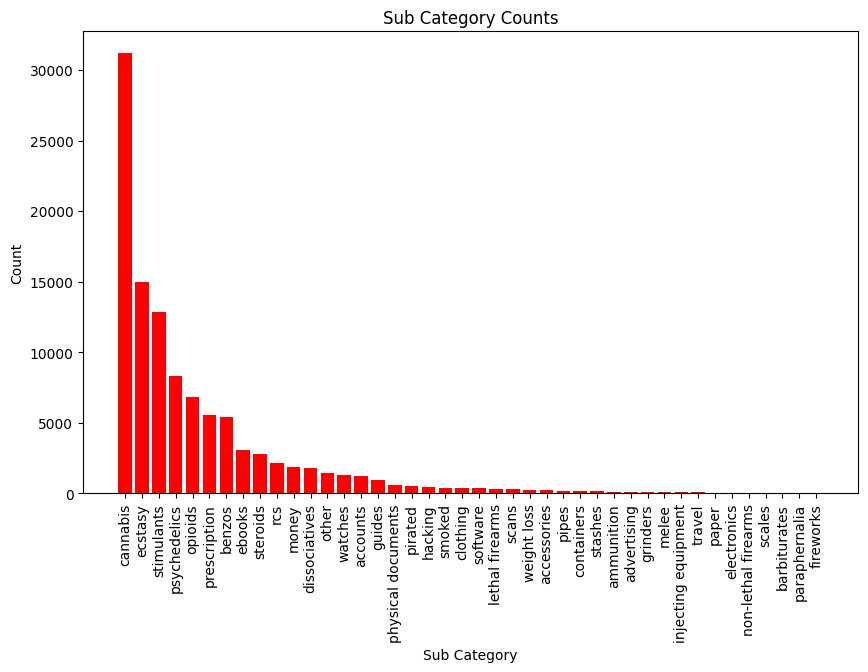

In [9]:
#Distribution of sub_category
plt.figure(figsize=(10,6))
plt.bar(df_sub['sub_category'], df_sub['count'], color='red')
plt.title('Sub Category Counts')
plt.xlabel('Sub Category')
plt.ylabel('Count')
plt.xticks(rotation=90) # This makes the labels visible
plt.show()

### 2/ Price analysis

In [11]:
#Price of products in dark markets
#Let's first convert the BTC in USD

conversion_rate = 327 # Conversion rate from Bitcoin to USD in 2015
df['price_in_usd'] = df['price'] * conversion_rate
df['price_in_usd'] = df['price_in_usd'].round(2)


df.head(50)

,vendor,category,item,item_description,price,origin,destination,rating,numeric_rating,rating_category,main_category,sub_category,2,3,price_in_usd
0,cheappaytv,services/hacking,12 Month HuluPlus gift Code,12-Month HuluPlus Codes for $25. They are wort...,0.050270,NaN,NaN,4.96/5,4.960,positive,services,hacking,NaN,NaN,16.44
1,cheappaytv,services/hacking,Pay TV Sky UK Sky Germany HD TV and much mor...,Hi we offer a World Wide CCcam Service for En...,0.152420,NaN,NaN,4.96/5,4.960,positive,services,hacking,NaN,NaN,49.84
2,kryptykog,services/hacking,OFFICIAL Account Creator Extreme 4.2,Tagged Submission Fix Bebo Submission Fix Adju...,0.007000,NaN,NaN,4.93/5,4.930,positive,services,hacking,NaN,NaN,2.29
3,cyberzen,services/hacking,VPN > TOR > SOCK TUTORIAL,How to setup a VPN > TOR > SOCK super safe enc...,0.019017,NaN,NaN,4.89/5,4.890,positive,services,hacking,NaN,NaN,6.22
4,businessdude,services/hacking,Facebook hacking guide,. This guide will teach you how to hack Faceb...,0.062018,NaN,NaN,4.88/5,4.880,positive,services,hacking,NaN,NaN,20.28
5,hackyboy,services/hacking,DDOS ATTACK SERVICE,New service available : Take down all websites...,0.030109,NaN,NaN,4.92/5,4.920,positive,services,hacking,NaN,NaN,9.85
6,businessdude,services/hacking,ATM HACKING TUTORIAL,Step by Step guide and Manuals to hack ATMs ...,0.033176,NaN,NaN,4.88/5,4.880,positive,services,hacking,NaN,NaN,10.85
7,cheappaytv,services/hacking,CALL/SMS verification service!,Need to register an account with sms verificat...,0.012617,NaN,NaN,4.96/5,4.960,positive,services,hacking,NaN,NaN,4.13
8,toysoldiers,services/hacking,Mac & windows address changer,- Comes with complete database to randomly cho...,0.009336,NaN,NaN,4.94/5,4.940,positive,services,hacking,NaN,NaN,3.05
9,cyberzen,services/hacking,WiFi Hacking,-Hacking WEP/WPA/WPA2 the glory of WPS -Hacki...,0.027091,NaN,NaN,4.89/5,4.890,positive,services,hacking,NaN,NaN,8.86


In [12]:
df['price_in_usd'].describe()

count    1.096450e+05
mean     7.249937e+03
std      3.393740e+05
min      0.000000e+00
25%      4.035000e+01
50%      1.252100e+02
75%      4.356500e+02
max      4.263952e+07
Name: price_in_usd, dtype: float64

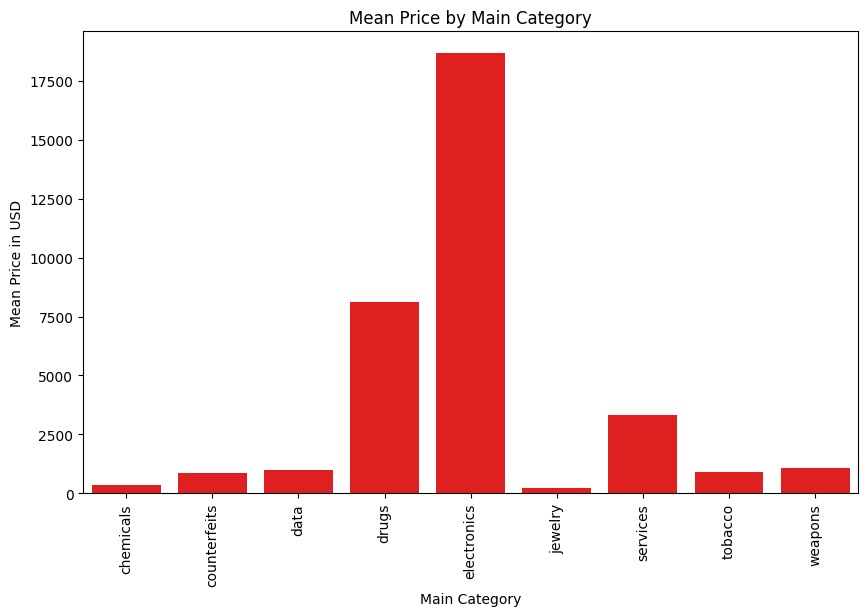

In [13]:
# The mean price for each main category
mean_prices = df.groupby('main_category')['price_in_usd'].mean()
mean_prices_df = pd.DataFrame({'main_category': mean_prices.index, 'mean_price': mean_prices.values})

#################################################

# The bar plot of main_category regarding their mean price in USD
plt.figure(figsize=(10,6))
sns.barplot(x='main_category', y='mean_price', data=mean_prices_df, color='red')
plt.title('Mean Price by Main Category')
plt.xlabel('Main Category')
plt.ylabel('Mean Price in USD')
plt.xticks(rotation=90) # This makes the labels visible
plt.show()


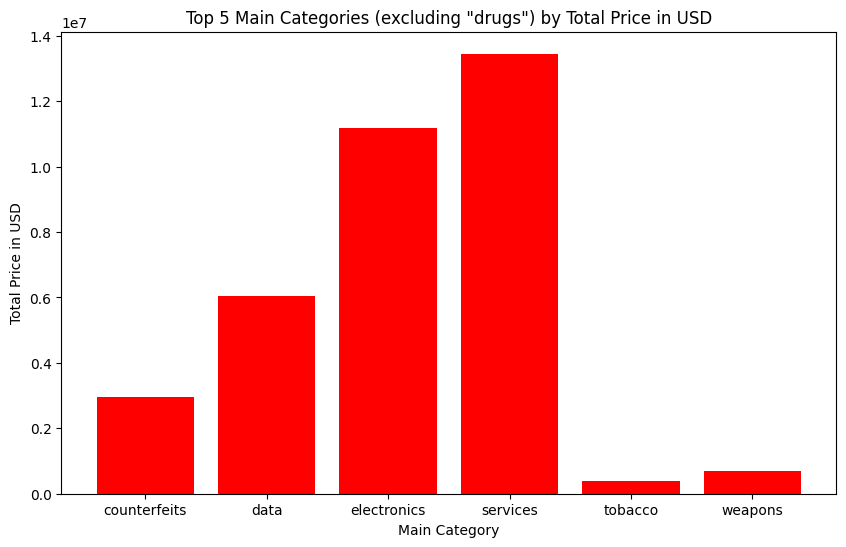

In [14]:
#the top 6 main categories, excluding 'drugs' because it represents a big category
top_6_main_categories = df[df['main_category'] != 'drugs'].groupby('main_category')['price_in_usd'].sum().nlargest(6).index.tolist()
top_6_main_categories.sort()

#bar plot of the top 5 main categories (excluding 'drug') 
plt.figure(figsize=(10, 6))
plt.bar(top_6_main_categories, df[df['main_category'].isin(top_6_main_categories)].groupby('main_category')['price_in_usd'].sum(), color='red')
plt.xlabel('Main Category')
plt.ylabel('Total Price in USD')
plt.title('Top 5 Main Categories (excluding "drugs") by Total Price in USD')
plt.show()

In [15]:
#EMAIL PRICE

In [16]:
#filter the df based on item descriptions containing keywords: EMAIL
df['item_description'].fillna('', inplace=True) #replace missing values with an empty string
filtered_df_email = df[df['item_description'].str.contains('email|emails|mail', case=False)]

C:\Users\ploitploit\AppData\Local\Temp\ipykernel_11884\424302546.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['item_description'].fillna('', inplace=True) #replace missing values with an empty string


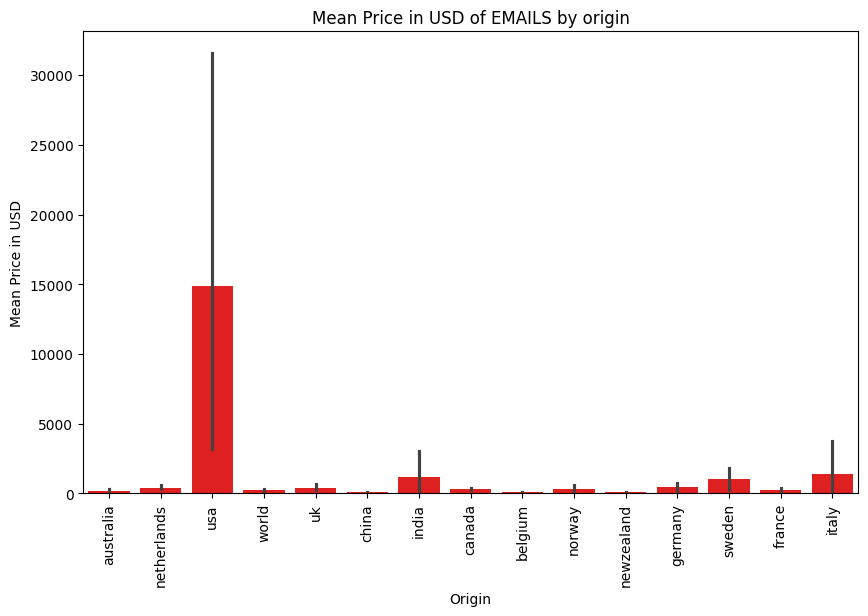

In [17]:
#the mean price plot of EMAILS by origin 
plt.figure(figsize=(10, 6))
sns.barplot(x='origin', y='price_in_usd', data=filtered_df_email, estimator=np.mean, color='red')
plt.xlabel('Origin')
plt.ylabel('Mean Price in USD')
plt.title('Mean Price in USD of EMAILS by origin')
plt.xticks(rotation=90) # This makes the labels visible
plt.show()

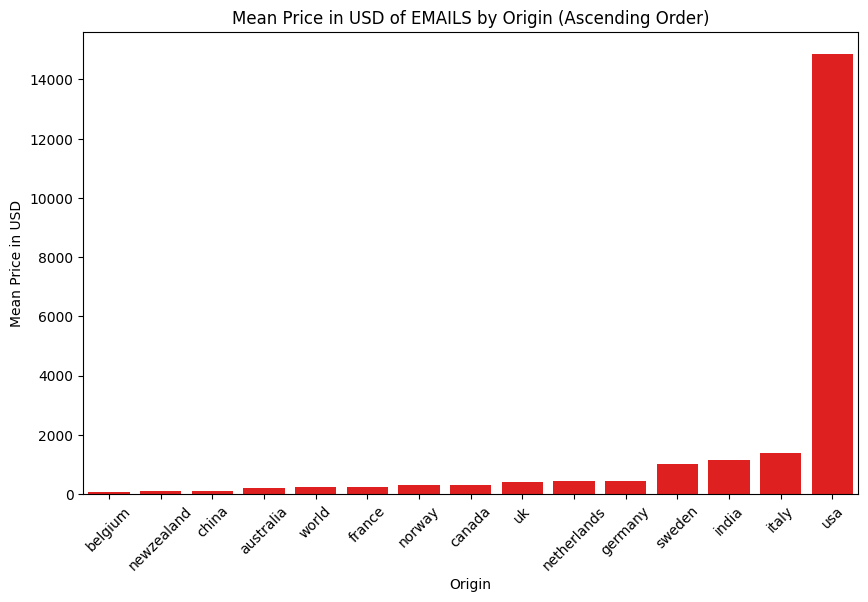

In [18]:
#the mean price of EMAILS by origin and sort in ascending order
mean_price_by_origin = filtered_df_email.groupby('origin')['price_in_usd'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=mean_price_by_origin.index, y=mean_price_by_origin.values, color='red')
plt.xlabel('Origin')
plt.ylabel('Mean Price in USD')
plt.title('Mean Price in USD of EMAILS by Origin (Ascending Order)')
plt.xticks(rotation=45)
plt.show()

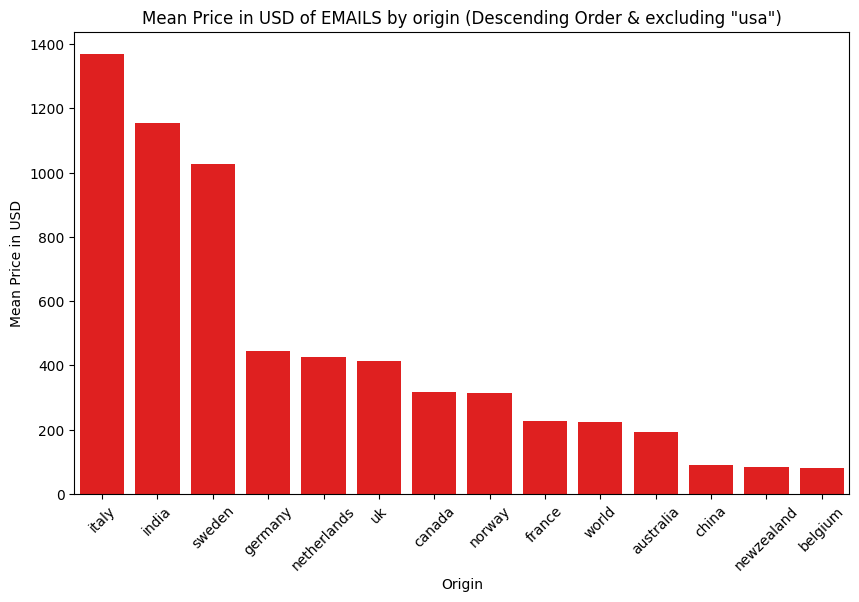

In [19]:
#the mean price by origin and sort in descending order
mean_price_email_by_origin = filtered_df_email[filtered_df_email['origin'] != 'usa'].groupby('origin')['price_in_usd'].mean().sort_values(ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x=mean_price_email_by_origin.index, y=mean_price_email_by_origin.values, color='red')
plt.xlabel('Origin')
plt.ylabel('Mean Price in USD')
plt.title('Mean Price in USD of EMAILS by origin (Descending Order & excluding "usa")')
plt.xticks(rotation=45)
plt.show()

In [20]:
#PASSPORT PRICE

In [21]:
#filter the df based on item descriptions containing keywords: PASSPORT
df['item_description'].fillna('', inplace=True) #replace missing values with an empty string
filtered_df_passport = df[df['item_description'].str.contains('passport|passports', case=False)]

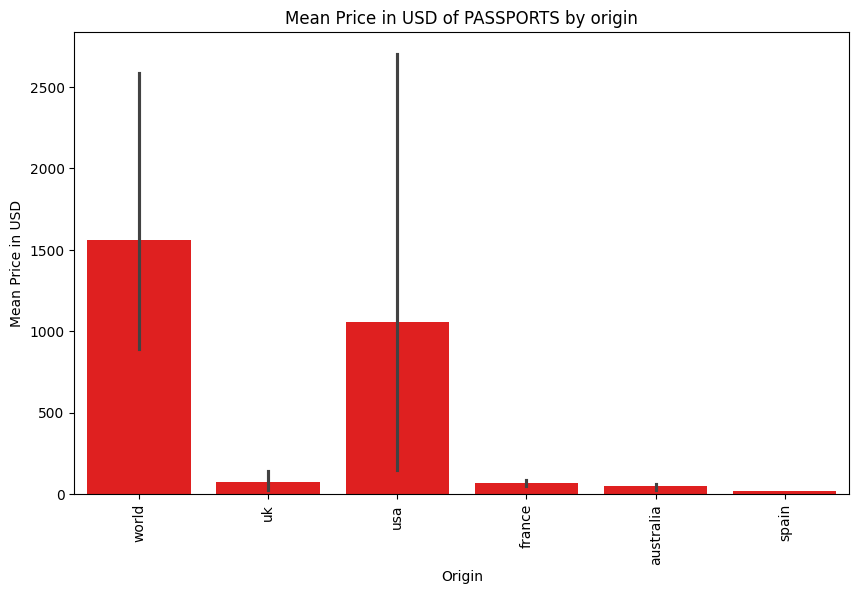

In [22]:
#the mean price plot of PASSPORTS by origin 
plt.figure(figsize=(10, 6))
sns.barplot(x='origin', y='price_in_usd', data=filtered_df_passport, estimator=np.mean, color='red')
plt.xlabel('Origin')
plt.ylabel('Mean Price in USD')
plt.title('Mean Price in USD of PASSPORTS by origin')
plt.xticks(rotation=90) # This makes the labels visible
plt.show()

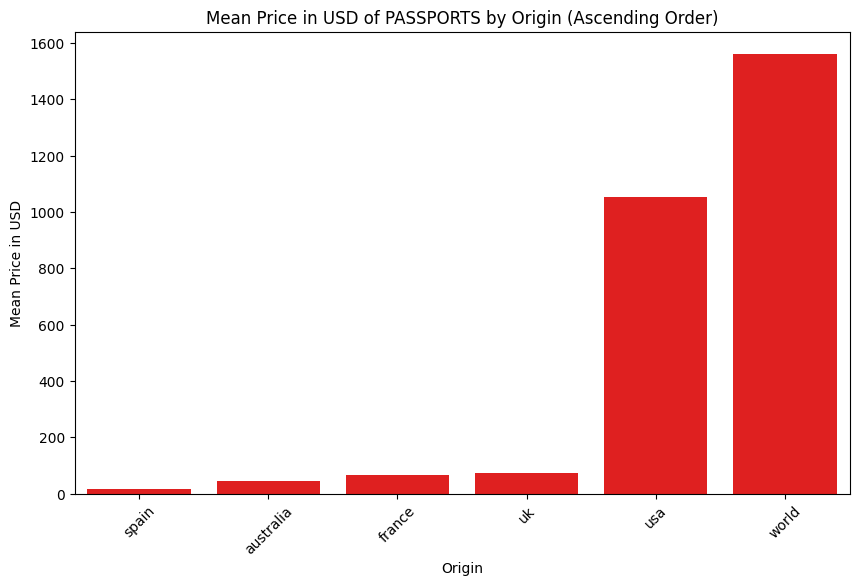

In [23]:
#the mean price of PASSPORT by origin and sort in ascending order
mean_price_by_origin = filtered_df_passport.groupby('origin')['price_in_usd'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=mean_price_by_origin.index, y=mean_price_by_origin.values, color='red')
plt.xlabel('Origin')
plt.ylabel('Mean Price in USD')
plt.title('Mean Price in USD of PASSPORTS by Origin (Ascending Order)')
plt.xticks(rotation=45)
plt.show()

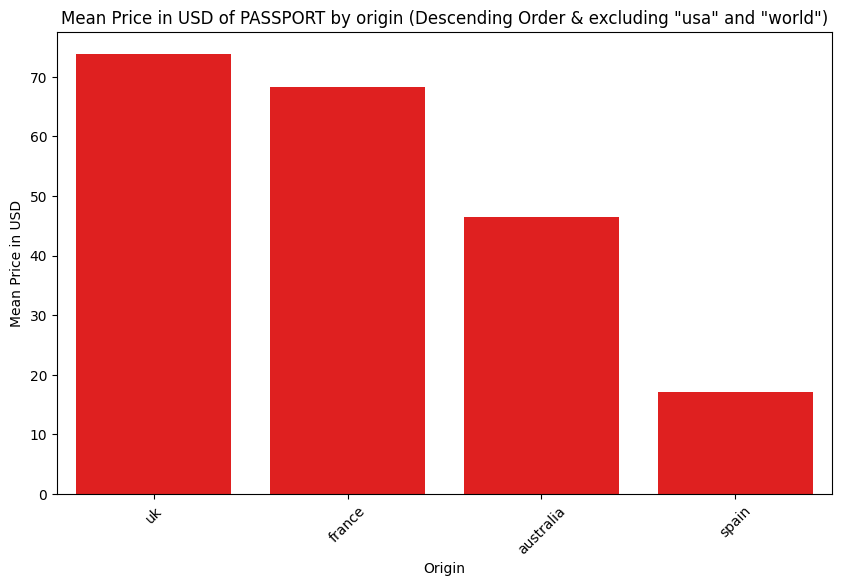

In [24]:
#the mean price of PASSPORT by origin and sort in descending order
#'usa' and 'world' origin categories excluded
filtered_df_passport_excluded = filtered_df_passport[~filtered_df_passport['origin'].isin(['usa', 'world'])]
mean_price_passport_by_origin = filtered_df_passport_excluded.groupby('origin')['price_in_usd'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=mean_price_passport_by_origin.index, y=mean_price_passport_by_origin.values, color='red')
plt.xlabel('Origin')
plt.ylabel('Mean Price in USD')
plt.title('Mean Price in USD of PASSPORT by origin (Descending Order & excluding "usa" and "world")')
plt.xticks(rotation=45)
plt.show()

In [25]:
#CREDIT_CARD PRICE

In [26]:
#filter the df based on item descriptions containing keywords: CREDIT_CARD
df['item_description'].fillna('', inplace=True) #replace missing values with an empty string
filtered_df_credit_card = df[df['item_description'].str.contains('credit|credits|card|cards', case=False)]

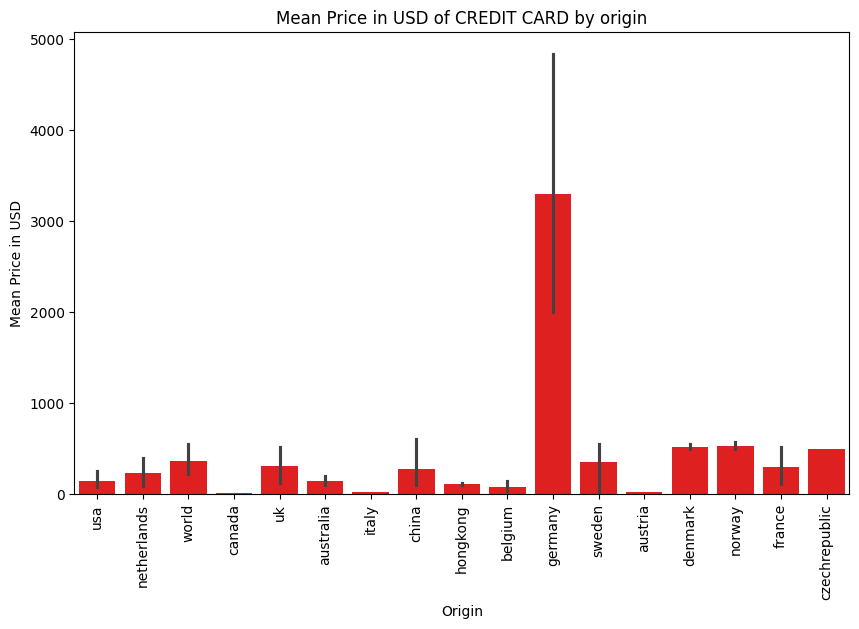

In [27]:
#the mean price plot of CREDIT_CARD by origin 
plt.figure(figsize=(10, 6))
sns.barplot(x='origin', y='price_in_usd', data=filtered_df_credit_card, estimator=np.mean, color='red')
plt.xlabel('Origin')
plt.ylabel('Mean Price in USD')
plt.title('Mean Price in USD of CREDIT CARD by origin')
plt.xticks(rotation=90) # This makes the labels visible
plt.show()

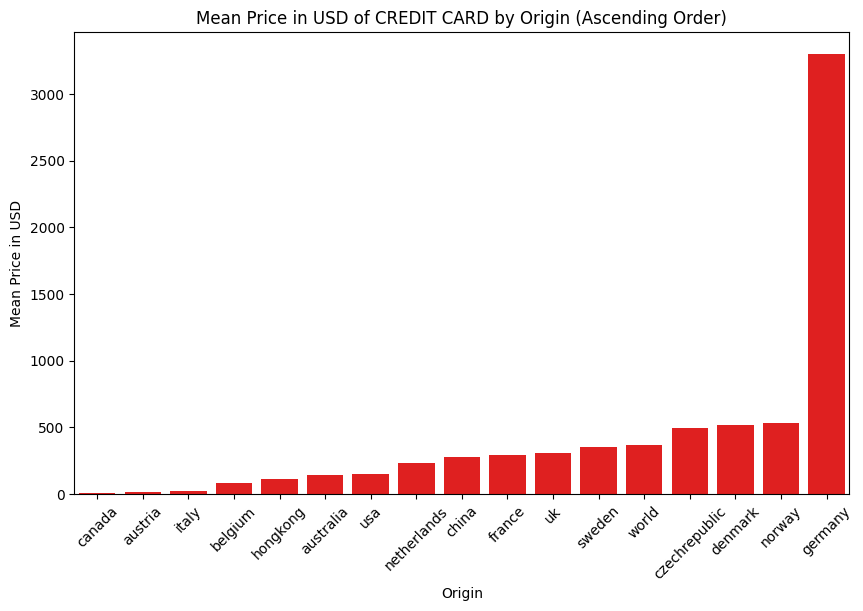

In [28]:
#the mean price of CREDIT_CARD by origin and sort in ascending order
mean_price_by_origin = filtered_df_credit_card.groupby('origin')['price_in_usd'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=mean_price_by_origin.index, y=mean_price_by_origin.values, color='red')
plt.xlabel('Origin')
plt.ylabel('Mean Price in USD')
plt.title('Mean Price in USD of CREDIT CARD by Origin (Ascending Order)')
plt.xticks(rotation=45)
plt.show()

### 3/ Origin & Destination analysis

In [30]:
#Origin of products 
#The percentage of products per origin
df['origin'].value_counts(normalize=True).mul(100).reset_index(name='percentage')
origin_percentages = pd.DataFrame({'origin': df['origin'].value_counts(normalize=True).index, 'percentage': df['origin'].value_counts(normalize=True).values * 100})


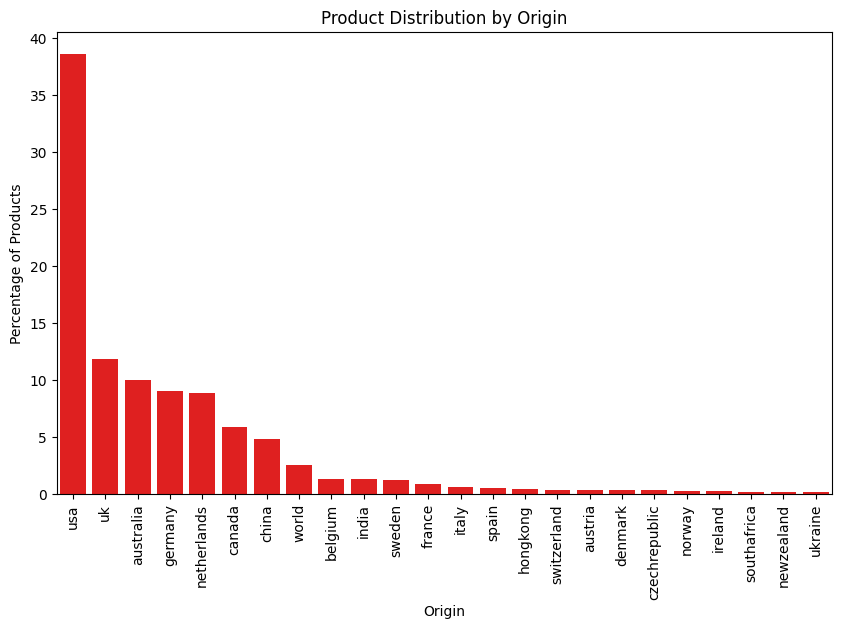

In [31]:
#The plot
plt.figure(figsize=(10,6))
sns.barplot(x='origin', y='percentage', data=origin_percentages, color='red')
plt.title('Product Distribution by Origin')
plt.xlabel('Origin')
plt.ylabel('Percentage of Products')
plt.xticks(rotation=90) # This makes the labels visible
plt.show()


In [32]:
#get the origin of the 3 main categories in volume

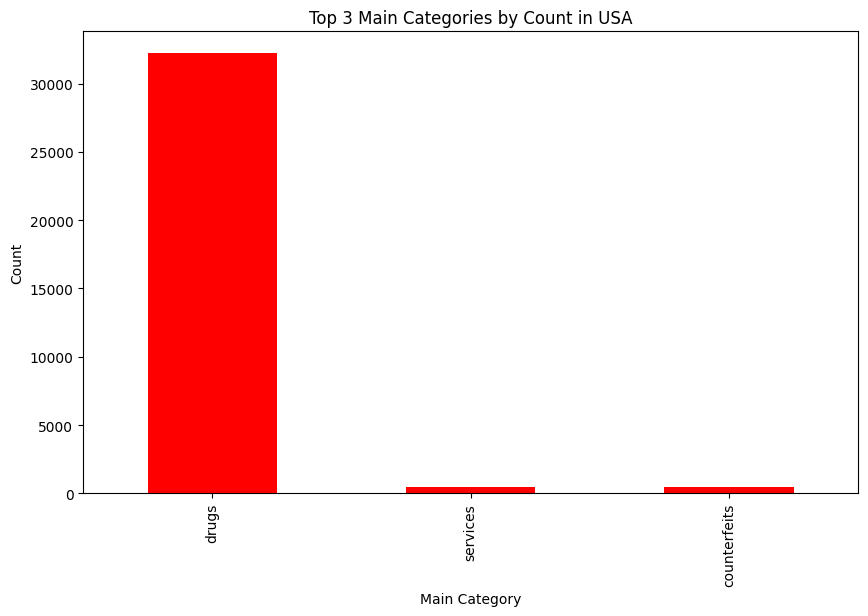

In [33]:
#filter the df for the specified countries
selected_countries = ['usa']
filtered_df = df[df['origin'].isin(selected_countries)]
category_counts = filtered_df['main_category'].value_counts().head(3)

#the bar plot of the top 3 main categories by count
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='red')
plt.xlabel('Main Category')
plt.ylabel('Count')
plt.title('Top 3 Main Categories by Count in USA')
plt.show()

In [34]:
#get the origin of the 3 main categories in volume, excluded 'drugs', as it is a big category everywhere

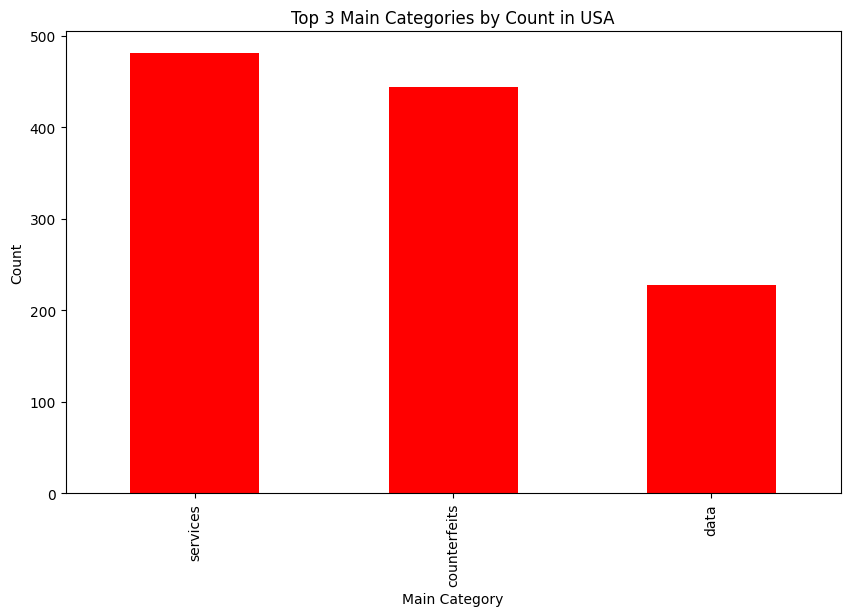

In [35]:
#filter the df for the specified countries
selected_countries = ['usa']
filtered_df = df[(df['origin'].isin(selected_countries)) & (df['main_category'] != 'drugs')]
category_counts = filtered_df['main_category'].value_counts().head(3)

#the bar plot of the top 3 main categories by count
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='red')
plt.xlabel('Main Category')
plt.ylabel('Count')
plt.title('Top 3 Main Categories by Count in USA')
plt.show()

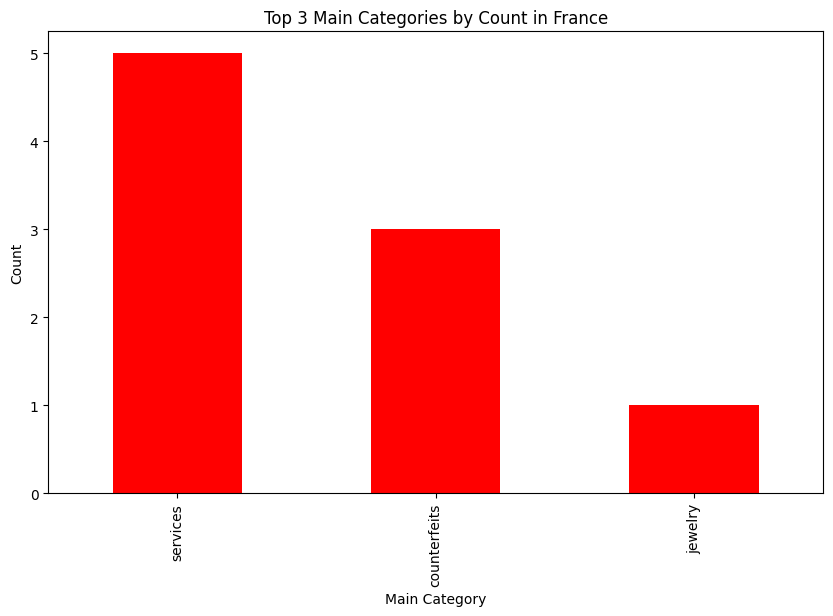

In [36]:
#filter the df for the specified countries
selected_countries = ['france']
filtered_df = df[(df['origin'].isin(selected_countries)) & (df['main_category'] != 'drugs')]
category_counts = filtered_df['main_category'].value_counts().head(3)

#the bar plot of the top 3 main categories by count
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='red')
plt.xlabel('Main Category')
plt.ylabel('Count')
plt.title('Top 3 Main Categories by Count in France')
plt.show()

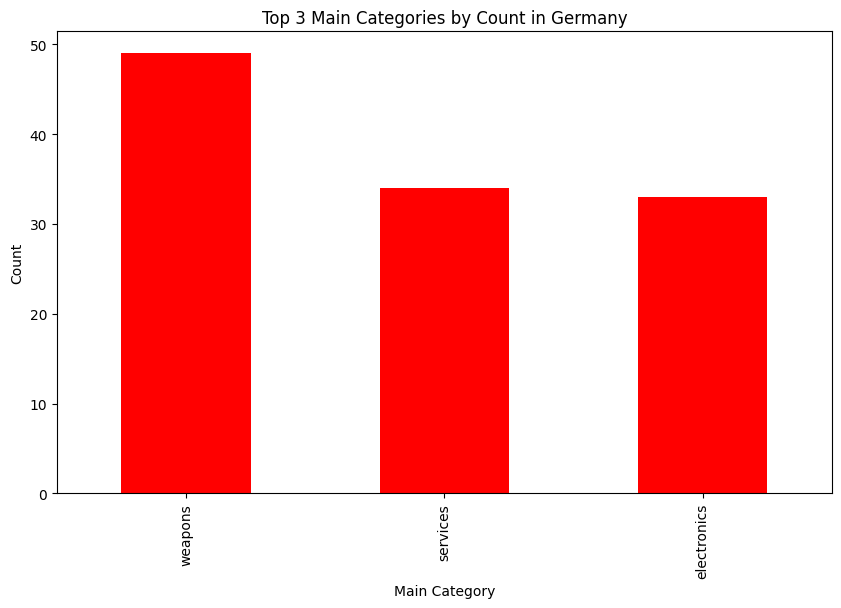

In [37]:
#filter the df for the specified countries
selected_countries = ['germany']
filtered_df = df[(df['origin'].isin(selected_countries)) & (df['main_category'] != 'drugs')]
category_counts = filtered_df['main_category'].value_counts().head(3)

#the bar plot of the top 3 main categories by count
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='red')
plt.xlabel('Main Category')
plt.ylabel('Count')
plt.title('Top 3 Main Categories by Count in Germany')
plt.show()

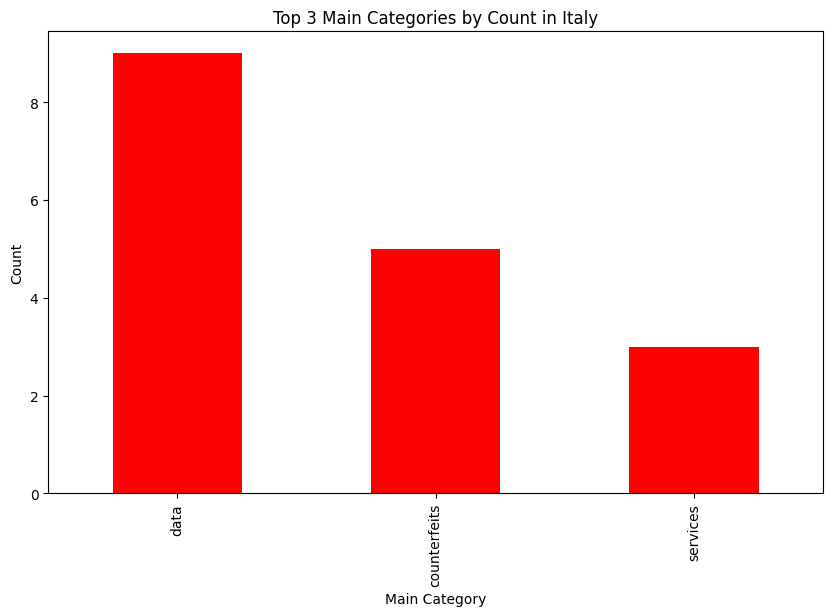

In [38]:
#filter the df for the specified countries
selected_countries = ['italy']
filtered_df = df[(df['origin'].isin(selected_countries)) & (df['main_category'] != 'drugs')]
category_counts = filtered_df['main_category'].value_counts().head(3)

#the bar plot of the top 3 main categories by count
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='red')
plt.xlabel('Main Category')
plt.ylabel('Count')
plt.title('Top 3 Main Categories by Count in Italy')
plt.show()

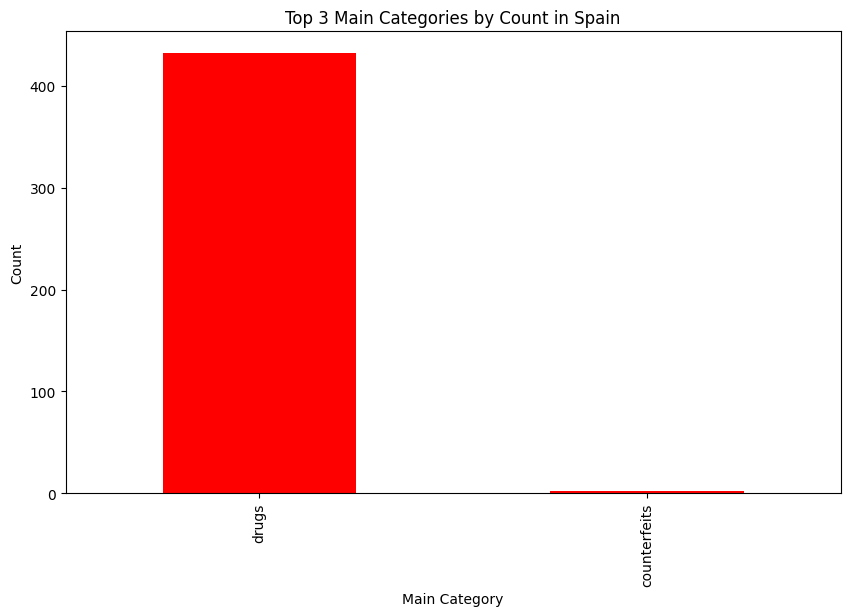

In [39]:
#only 2 categories
#filter the df for the specified countries
selected_countries = ['spain']
filtered_df = df[df['origin'].isin(selected_countries)]
category_counts = filtered_df['main_category'].value_counts().head(3)

#the bar plot of the top 3 main categories by count
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='red')
plt.xlabel('Main Category')
plt.ylabel('Count')
plt.title('Top 3 Main Categories by Count in Spain')
plt.show()

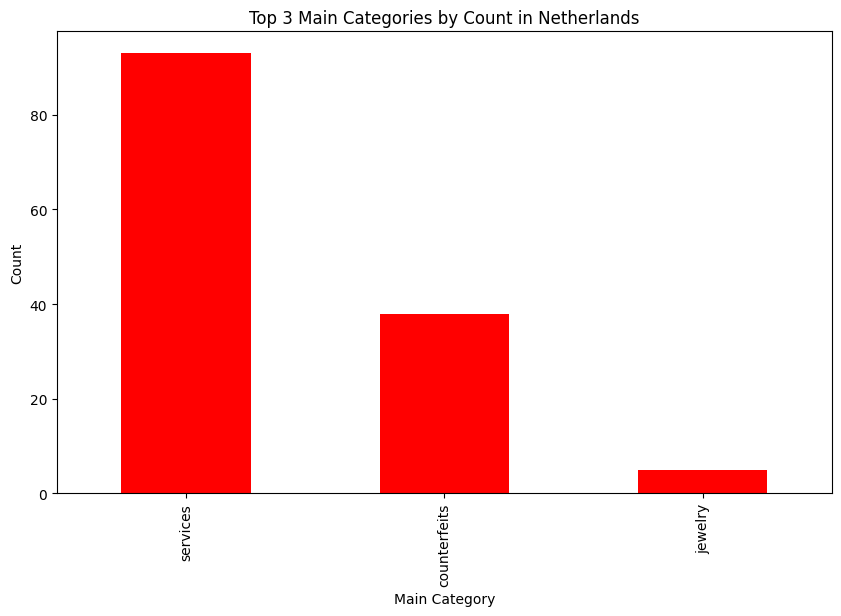

In [40]:
#filter the df for the specified countries
selected_countries = ['netherlands']
filtered_df = df[(df['origin'].isin(selected_countries)) & (df['main_category'] != 'drugs')]
category_counts = filtered_df['main_category'].value_counts().head(3)

#the bar plot of the top 3 main categories by count
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='red')
plt.xlabel('Main Category')
plt.ylabel('Count')
plt.title('Top 3 Main Categories by Count in Netherlands')
plt.show()

In [41]:
#TOFIIIIIIILLLL Observations :
    
#     We can now say that the USA is one of the most targeted country in terms of cyber attacks, with China & the UK as seconddary targets, 
#     It seems that the period post covid has seen the explosion of the number of attacks (2020/2021)
#     And that Phishing and Malware are the main threats to private and public actors at the moment 
#     Phishing and Malware are the main entry doors to Ransomwares attacks, which we will analyse in more deta

In [42]:
# Destination of products 
#The percentage of products per destination
df['destination'].value_counts(normalize=True).mul(100).reset_index(name='percentage')
destination_percentages = pd.DataFrame({'destination': df['destination'].value_counts(normalize=True).index, 'percentage': df['destination'].value_counts(normalize=True).values * 100})

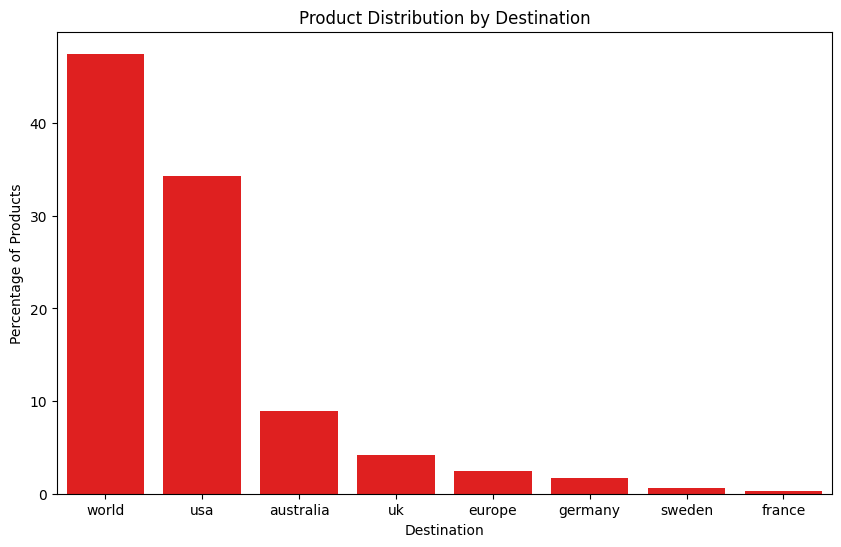

In [43]:
#The plot
plt.figure(figsize=(10,6))
sns.barplot(x='destination', y='percentage', data=destination_percentages, color='red')
plt.title('Product Distribution by Destination')
plt.xlabel('Destination')
plt.ylabel('Percentage of Products')
plt.show()

### 4/ Extracting some information from the ratings 

In [48]:
df.head(2)

,vendor,category,item,item_description,price,origin,destination,rating,numeric_rating,rating_category,main_category,sub_category,2,3,price_in_usd
0,cheappaytv,services/hacking,12 Month HuluPlus gift Code,12-Month HuluPlus Codes for $25. They are wort...,0.05027,NaN,NaN,4.96/5,4.96,positive,services,hacking,NaN,NaN,16.44
1,cheappaytv,services/hacking,Pay TV Sky UK Sky Germany HD TV and much mor...,Hi we offer a World Wide CCcam Service for En...,0.15242,NaN,NaN,4.96/5,4.96,positive,services,hacking,NaN,NaN,49.84


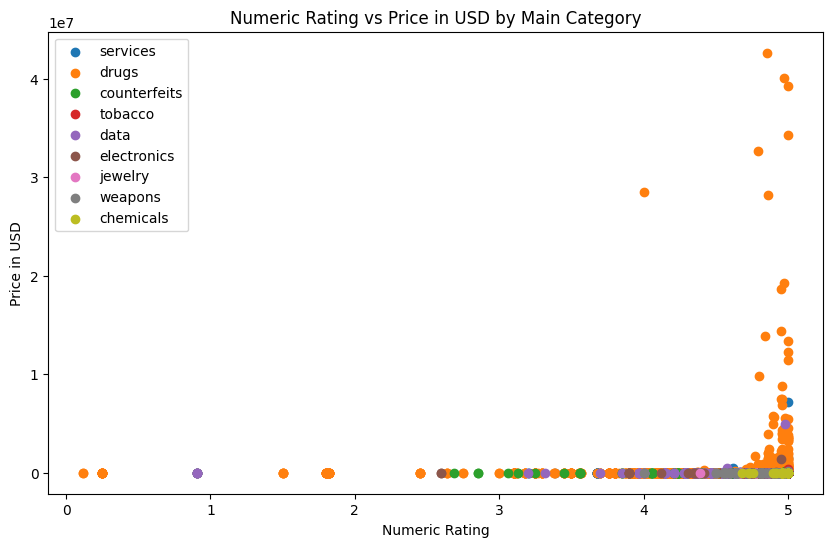

In [49]:
#scatter plot of 'numeric_rating' vs 'price_in_usd' regarding 'main_category'
plt.figure(figsize=(10, 6))
for category in df['main_category'].unique():
    category_df = df[df['main_category'] == category]
    plt.scatter(category_df['numeric_rating'], category_df['price_in_usd'], label=category)

plt.xlabel('Numeric Rating')
plt.ylabel('Price in USD')
plt.title('Numeric Rating vs Price in USD by Main Category')
plt.legend()
plt.show()

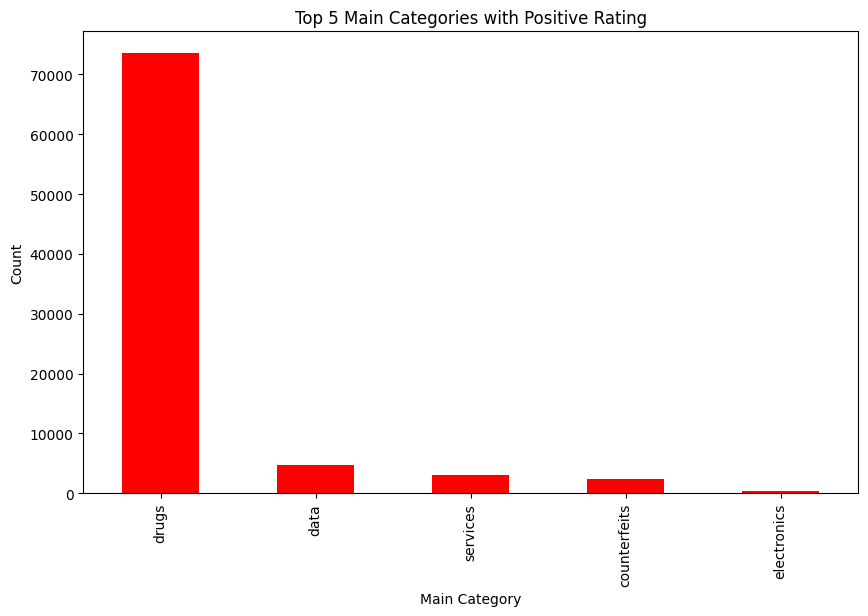

In [50]:
#filter the df for rows with 'rating_category' equal to 'positive'
filtered_df = df[df['rating_category'] == 'positive']
category_counts = filtered_df['main_category'].value_counts().head(5)

#bar plot of the top 5 main categories by count
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='red')
plt.xlabel('Main Category')
plt.ylabel('Count')
plt.title('Top 5 Main Categories with Positive Rating')
plt.show()

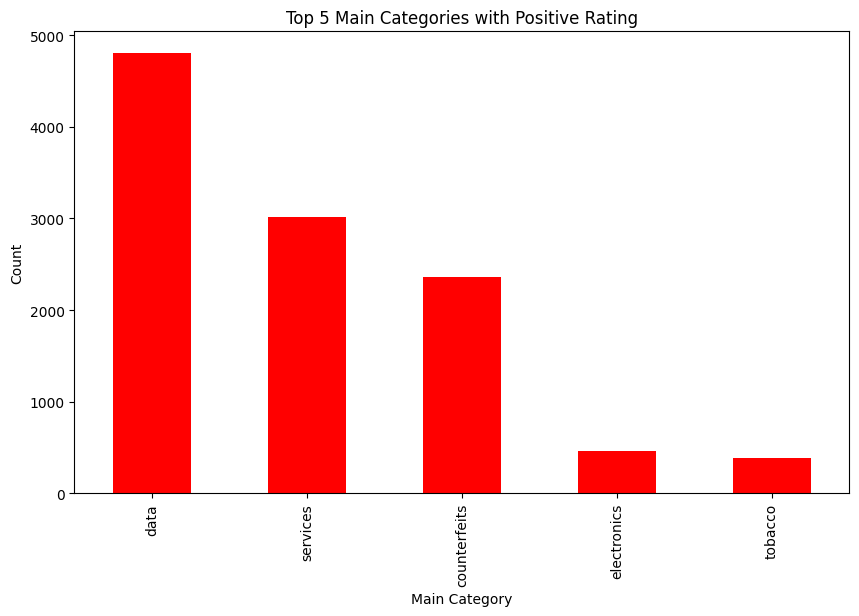

In [51]:
#'drugs' category excluded
filtered_df = df[(df['rating_category'] == 'positive') & (df['main_category'] != 'drugs')]
category_counts = filtered_df['main_category'].value_counts().head(5)

#bar plot of the top 5 main categories by count
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='red')
plt.xlabel('Main Category')
plt.ylabel('Count')
plt.title('Top 5 Main Categories with Positive Rating')
plt.show()

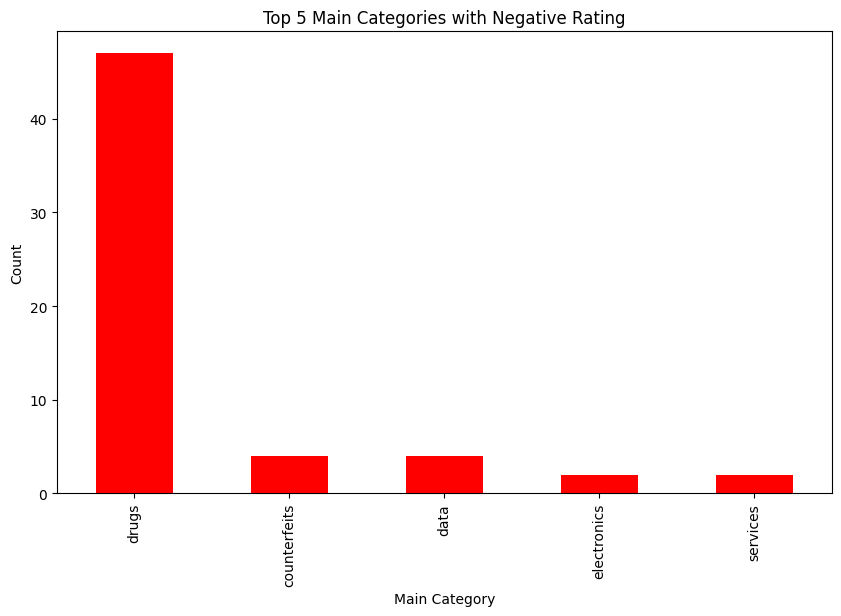

In [52]:
#filter the df for rows with 'rating_category' equal to 'negative'
filtered_df = df[df['rating_category'] == 'negative']
category_counts = filtered_df['main_category'].value_counts().head(5)

#bar plot of the top 5 main categories by count
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='red')
plt.xlabel('Main Category')
plt.ylabel('Count')
plt.title('Top 5 Main Categories with Negative Rating')
plt.show()

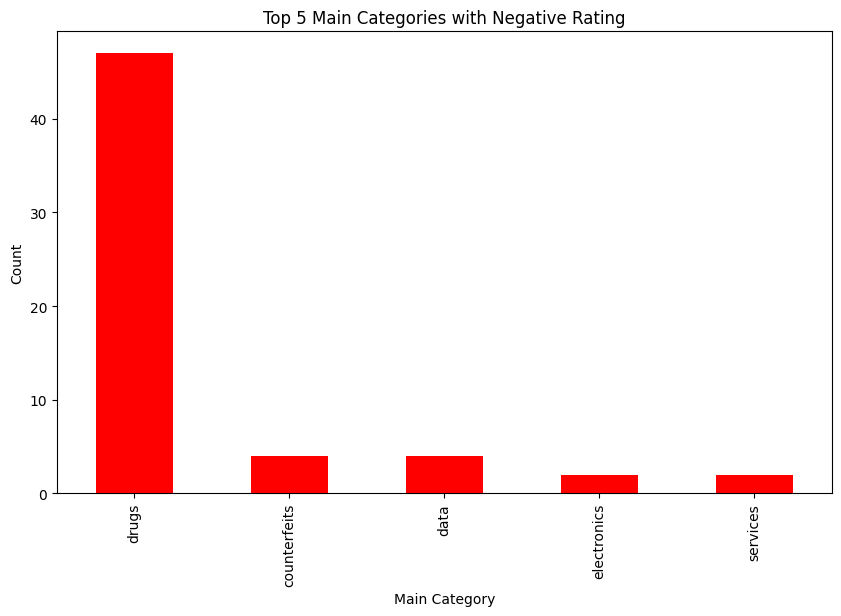

In [53]:
#'drugs' category excluded
filtered_df = df[(df['rating_category'] == 'negative') & (df['main_category'] != 'drugs')]
ategory_counts = filtered_df['main_category'].value_counts().head(5)

#bar plot of the top 5 main categories by count
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='red')
plt.xlabel('Main Category')
plt.ylabel('Count')
plt.title('Top 5 Main Categories with Negative Rating')
plt.show()

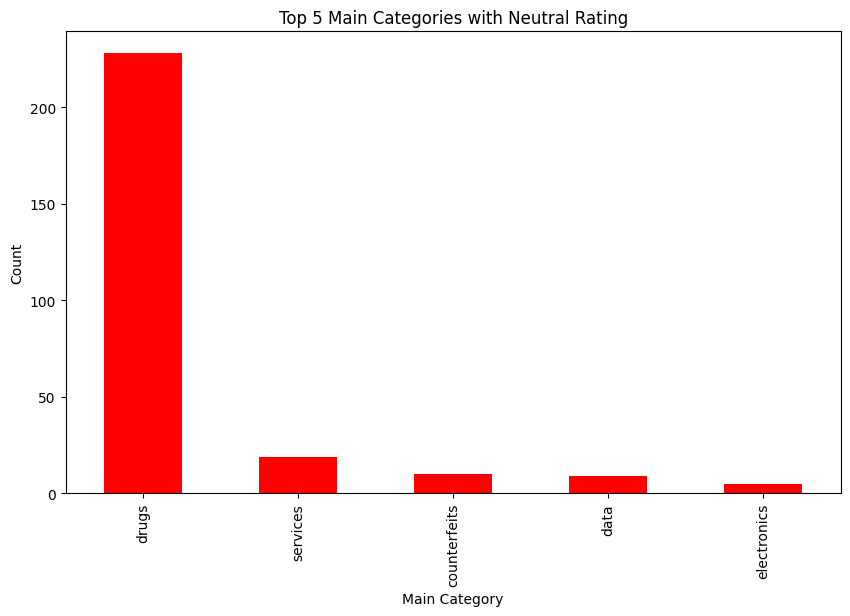

In [54]:
#filter the df for rows with 'rating_category' equal to 'neutral'
filtered_df = df[df['rating_category'] == 'neutral']
category_counts = filtered_df['main_category'].value_counts().head(5)

#bar plot of the top 5 main categories by count
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='red')
plt.xlabel('Main Category')
plt.ylabel('Count')
plt.title('Top 5 Main Categories with Neutral Rating')
plt.show()

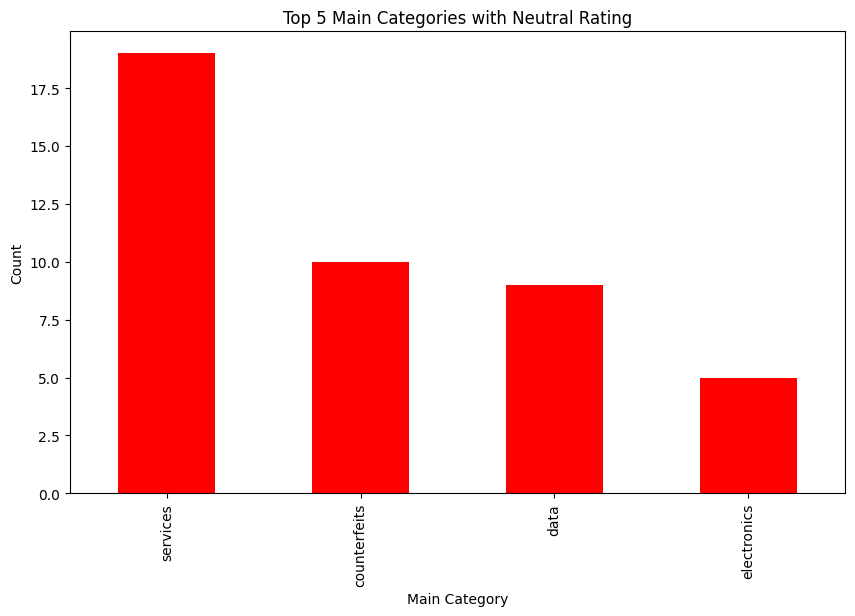

In [55]:
#'drugs' category excluded
filtered_df = df[(df['rating_category'] == 'neutral') & (df['main_category'] != 'drugs')]
category_counts = filtered_df['main_category'].value_counts().head(5)

#bar plot of the top 5 main categories by count
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='red')
plt.xlabel('Main Category')
plt.ylabel('Count')
plt.title('Top 5 Main Categories with Neutral Rating')
plt.show()

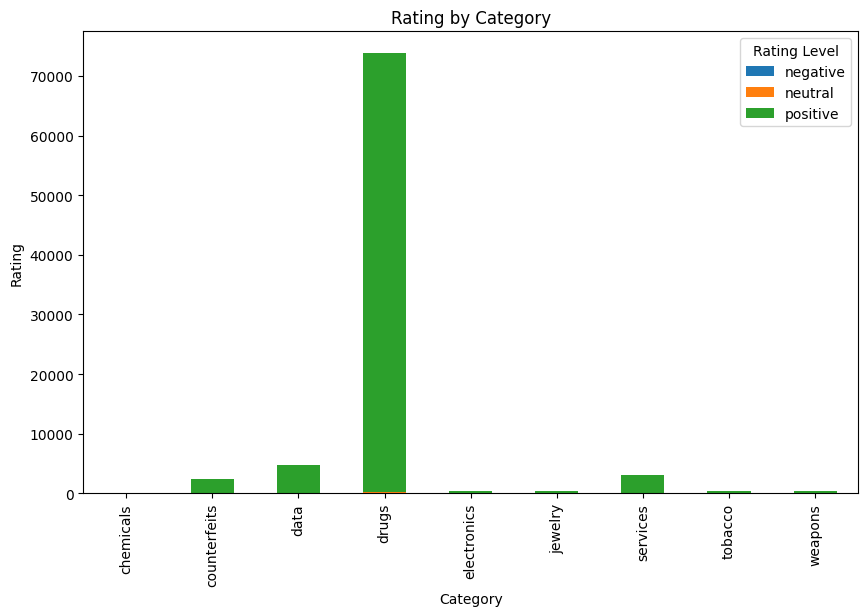

In [56]:
#RATING LEVEL BY CATEGORY
#filter out 'invalid rating' category
filtered_df = df[df['rating_category'] != 'Invalid rating']
#data by main_category and rating_category, and count the occurrences
counts = filtered_df.groupby(['main_category', 'rating_category']).size().unstack()


counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Category')
plt.ylabel('Rating')
plt.title('Rating by Category')
plt.legend(title='Rating Level')
plt.show()

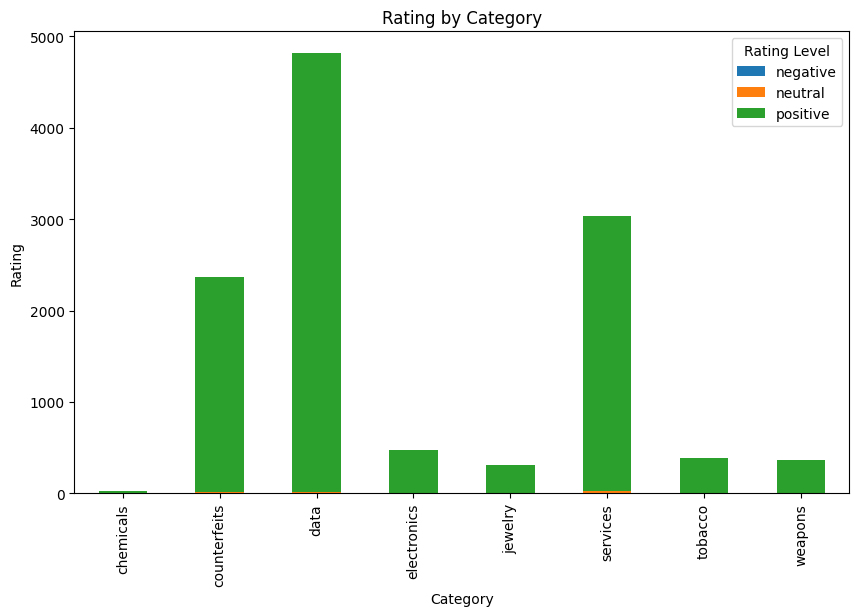

In [57]:
#RATING LEVEL BY CATEGORY, excluding the big 'drugs' category 
filtered_df = df[(df['rating_category'] != 'Invalid rating') & (df['main_category'] != 'drugs')]
counts = filtered_df.groupby(['main_category', 'rating_category']).size().unstack()

counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Category')
plt.ylabel('Rating')
plt.title('Rating by Category')
plt.legend(title='Rating Level')
plt.show()

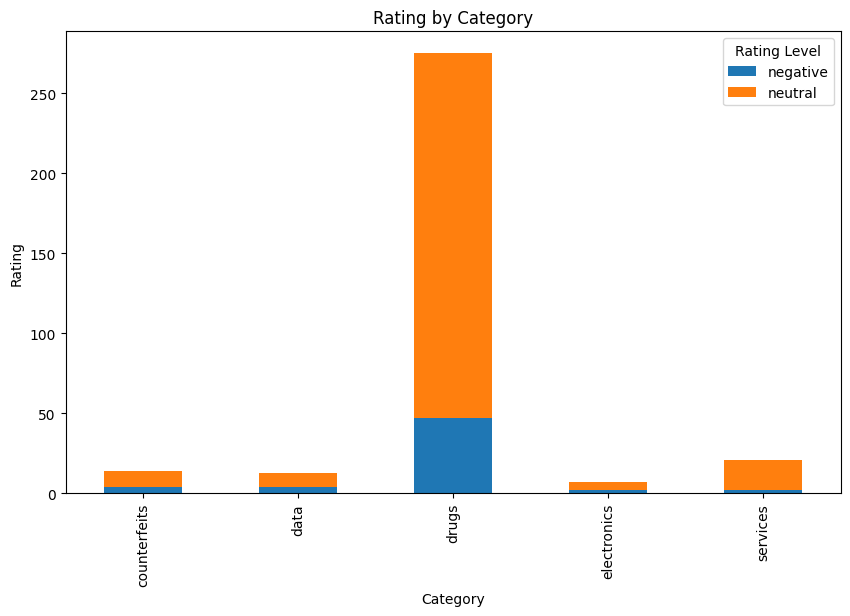

In [58]:
#RATING LEVEL BY CATEGORY, WITH NEUTRAL AND NEGATIVE RATING

#data by main_category and rating_category, and count the occurrences
filtered_df = df[~df['rating_category'].isin(['Invalid rating', 'positive'])]
counts = filtered_df.groupby(['main_category', 'rating_category']).size().unstack()

counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Category')
plt.ylabel('Rating')
plt.title('Rating by Category')
plt.legend(title='Rating Level')
plt.show()

### 5/ Temporal analysis

In [59]:
df_2020.head()

,main_category,category,product,price
0,data,Credit Card Data,Cloned Mastercard with PIN,15.0
1,data,Credit Card Data,Cloned American Express with PIN,35.0
2,data,Credit Card Data,Cloned VISA with PIN,25.0
3,data,Credit Card Data,"Credit card details, account balance up to $1000",12.0
4,data,Credit Card Data,"Credit card details, account balance up to $5000",20.0


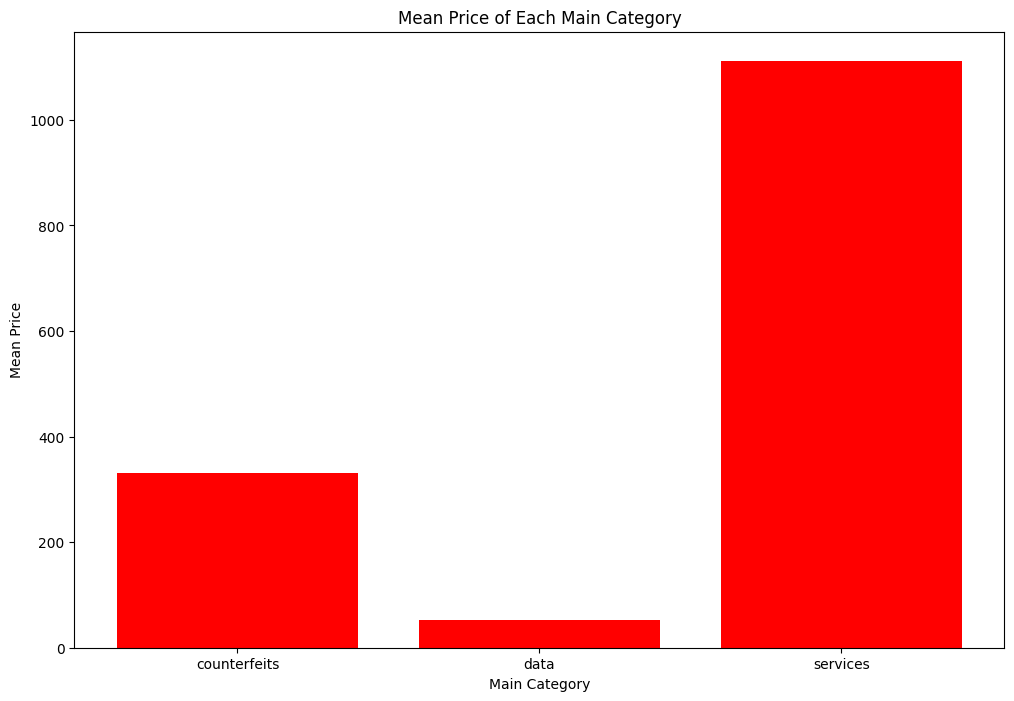

In [60]:
#The mean price of each main_category

#mean price for each main_category
mean_prices = df_2020.groupby('main_category')['price'].mean()


plt.figure(figsize=(12, 8))
plt.bar(mean_prices.index, mean_prices, color='red')
plt.xlabel('Main Category')
plt.ylabel('Mean Price')
plt.title('Mean Price of Each Main Category')
plt.show()

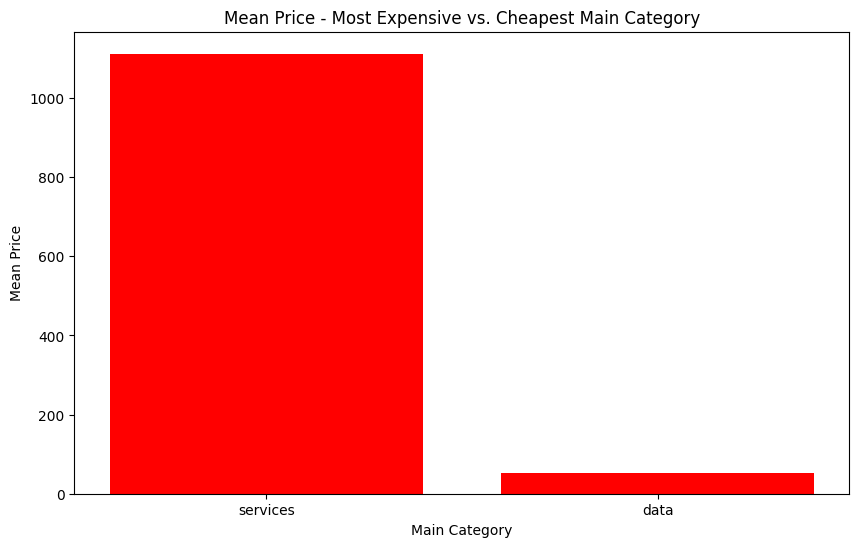

In [61]:
#The most expensive and the cheapest main_category

#the most expensive and cheapest main_categories
most_expensive = df_2020.groupby('main_category')['price'].max().idxmax()
cheapest = df_2020.groupby('main_category')['price'].min().idxmin()

plt.figure(figsize=(10, 6))
plt.bar([most_expensive, cheapest], [df_2020.loc[df_2020['main_category'] == most_expensive, 'price'].mean(), df_2020.loc[df_2020['main_category'] == cheapest, 'price'].mean()],  color='red')
plt.xlabel('Main Category')
plt.ylabel('Mean Price')
plt.title('Mean Price - Most Expensive vs. Cheapest Main Category')
plt.show()

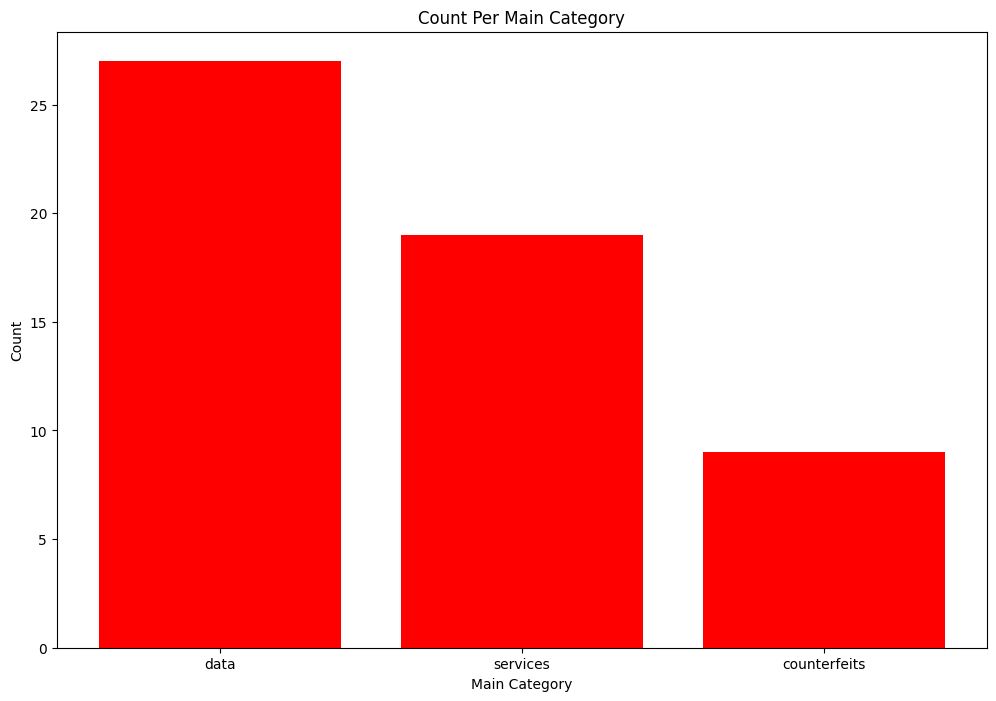

In [62]:
#Volume per main_category

#the count per main_category
category_counts = df_2020['main_category'].value_counts()


plt.figure(figsize=(12, 8))
plt.bar(category_counts.index, category_counts,  color='red')
plt.xlabel('Main Category')
plt.ylabel('Count')
plt.title('Count Per Main Category')
plt.show()

In [63]:
#Focus on data
df_2020_filtered = df_2020[df_2020['main_category'] == 'data']
df_2020_filtered

,main_category,category,product,price
0,data,Credit Card Data,Cloned Mastercard with PIN,15.00
1,data,Credit Card Data,Cloned American Express with PIN,35.00
2,data,Credit Card Data,Cloned VISA with PIN,25.00
3,data,Credit Card Data,"Credit card details, account balance up to $1000",12.00
4,data,Credit Card Data,"Credit card details, account balance up to $5000",20.00
5,data,Credit Card Data,"Stolen online banking logins, minimum $100 on ...",35.00
6,data,Credit Card Data,"Stolen online banking logins, minimum $2000 on...",65.00
7,data,Credit Card Data,Walmart account with credit card attached,10.00
8,data,Payment processing services,"Stolen PayPal account details, minimum $100",198.56
9,data,Payment processing services,"PayPal transfer from stolen account, $1000 â...",320.39


Font 'rm' does not have a glyph for '\x80' [U+80], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\x93' [U+93], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\x80' [U+80], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\x93' [U+93], substituting with a dummy symbol.


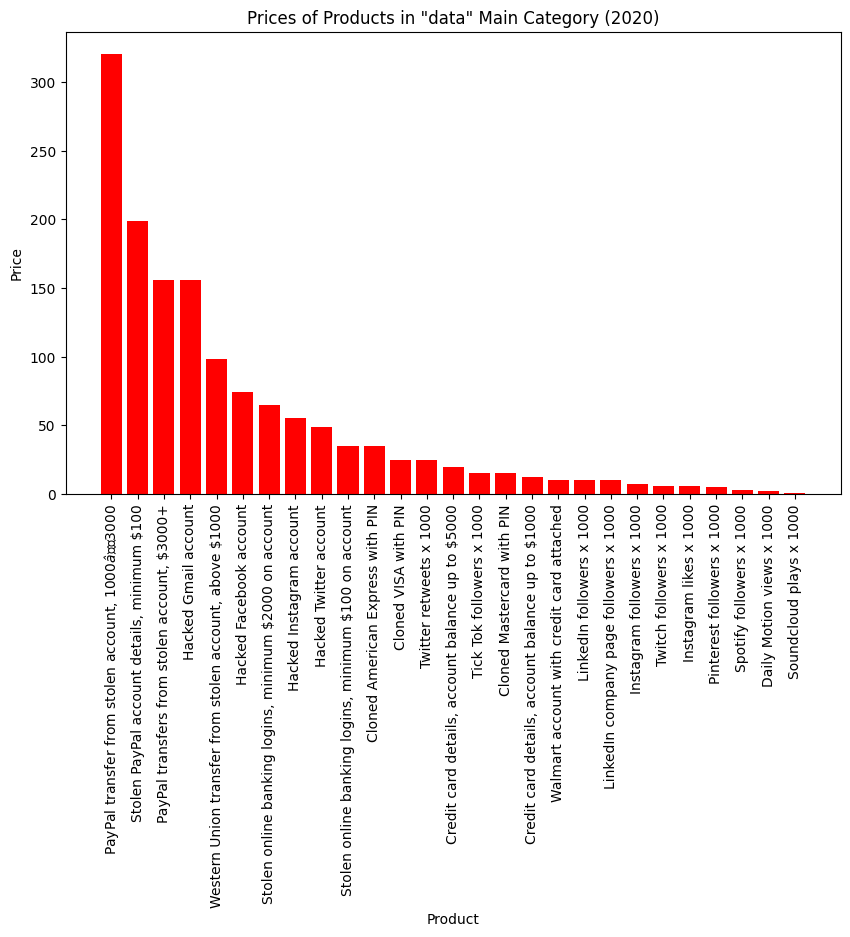

In [64]:
#'Prices of Products in "data" Main Category (2020)
# Sort the DataFrame by price in descending order
df_2020_sorted = df_2020_filtered.sort_values('price', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(df_2020_sorted['product'], df_2020_sorted['price'], color='red')
plt.xlabel('Product')
plt.ylabel('Price')
plt.title('Prices of Products in "data" Main Category (2020)')
plt.xticks(rotation=90)
plt.show()

In [65]:
df_2021.head()

,main_category,category,product,price
0,data,Credit Card Data,Cloned Mastercard with PIN,25
1,data,Credit Card Data,Cloned American Express with PIN,35
2,data,Credit Card Data,Cloned VISA with PIN,25
3,data,Credit Card Data,"Credit card details, account balance up to $1,000",150
4,data,Credit Card Data,"Credit card details, account balance up to $5,000",240


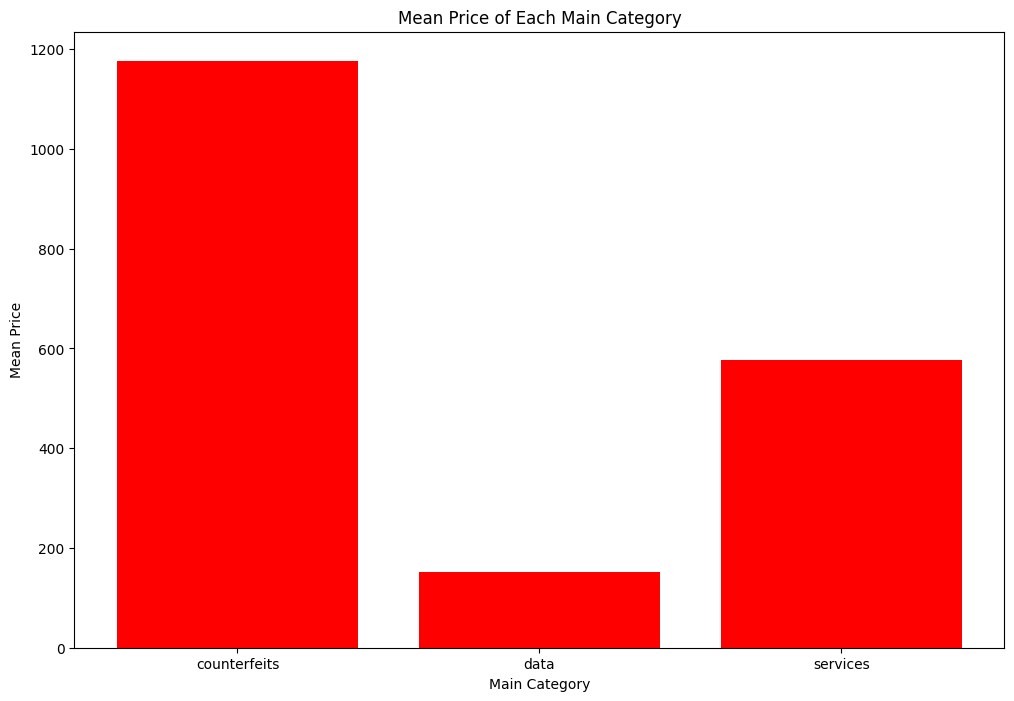

In [66]:
#The mean price of each main_category

#mean price for each main_category
mean_prices = df_2021.groupby('main_category')['price'].mean()


plt.figure(figsize=(12, 8))
plt.bar(mean_prices.index, mean_prices, color='red')
plt.xlabel('Main Category')
plt.ylabel('Mean Price')
plt.title('Mean Price of Each Main Category')
plt.show()

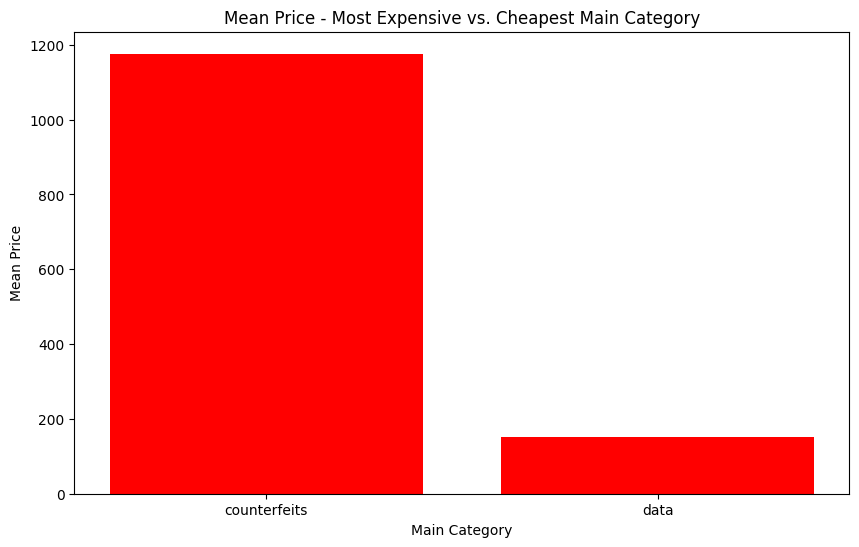

In [67]:
#The most expensive and the cheapest main_category

#the most expensive and cheapest main_categories
most_expensive = df_2021.groupby('main_category')['price'].max().idxmax()
cheapest = df_2021.groupby('main_category')['price'].min().idxmin()

plt.figure(figsize=(10, 6))
plt.bar([most_expensive, cheapest], [df_2021.loc[df_2021['main_category'] == most_expensive, 'price'].mean(), df_2021.loc[df_2021['main_category'] == cheapest, 'price'].mean()],  color='red')
plt.xlabel('Main Category')
plt.ylabel('Mean Price')
plt.title('Mean Price - Most Expensive vs. Cheapest Main Category')
plt.show()

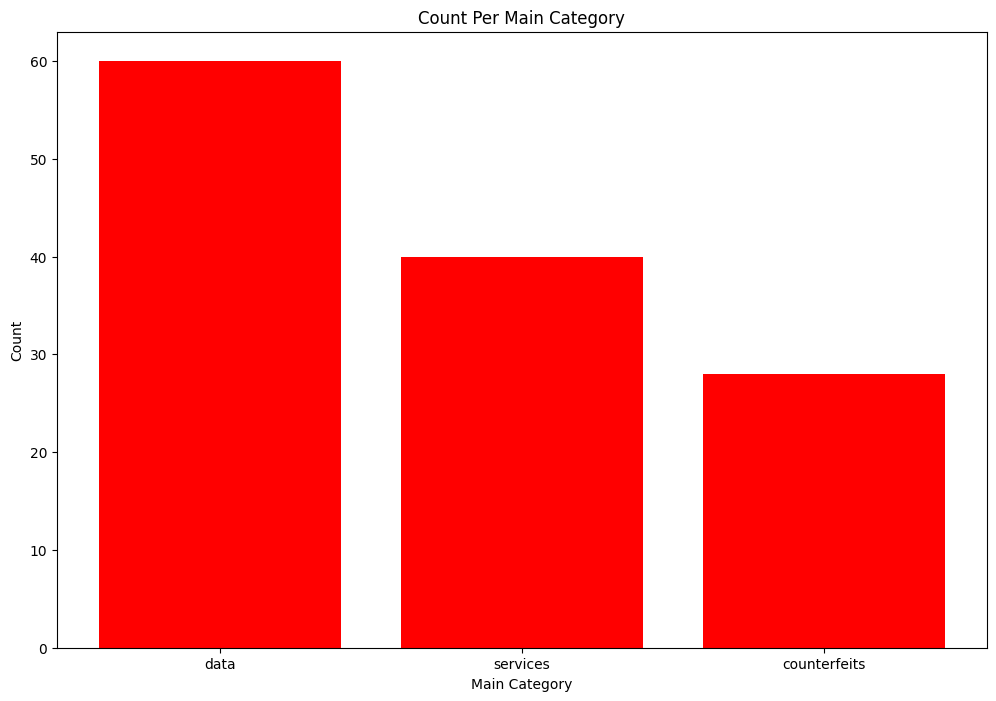

In [68]:
#Volume per main_category

#the count per main_category
category_counts = df_2021['main_category'].value_counts()


plt.figure(figsize=(12, 8))
plt.bar(category_counts.index, category_counts,  color='red')
plt.xlabel('Main Category')
plt.ylabel('Count')
plt.title('Count Per Main Category')
plt.show()

In [69]:
#Focus on data
df_2021_filtered = df_2021[df_2021['main_category'] == 'data']
df_2021_filtered

,main_category,category,product,price
0,data,Credit Card Data,Cloned Mastercard with PIN,25
1,data,Credit Card Data,Cloned American Express with PIN,35
2,data,Credit Card Data,Cloned VISA with PIN,25
3,data,Credit Card Data,"Credit card details, account balance up to $1,000",150
4,data,Credit Card Data,"Credit card details, account balance up to $5,000",240
5,data,Credit Card Data,"Stolen online banking logins, minimum $100 on ...",40
6,data,Credit Card Data,"Stolen online banking logins, minimum $2,000 o...",120
7,data,Credit Card Data,Walmart account with credit card attached,14
8,data,Credit Card Data,Hacked (Global) credit card details with CVV,35
9,data,Credit Card Data,USA hacked credit card details with CVV,17


Font 'rm' does not have a glyph for '\x80' [U+80], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\x93' [U+93], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\x80' [U+80], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\x93' [U+93], substituting with a dummy symbol.


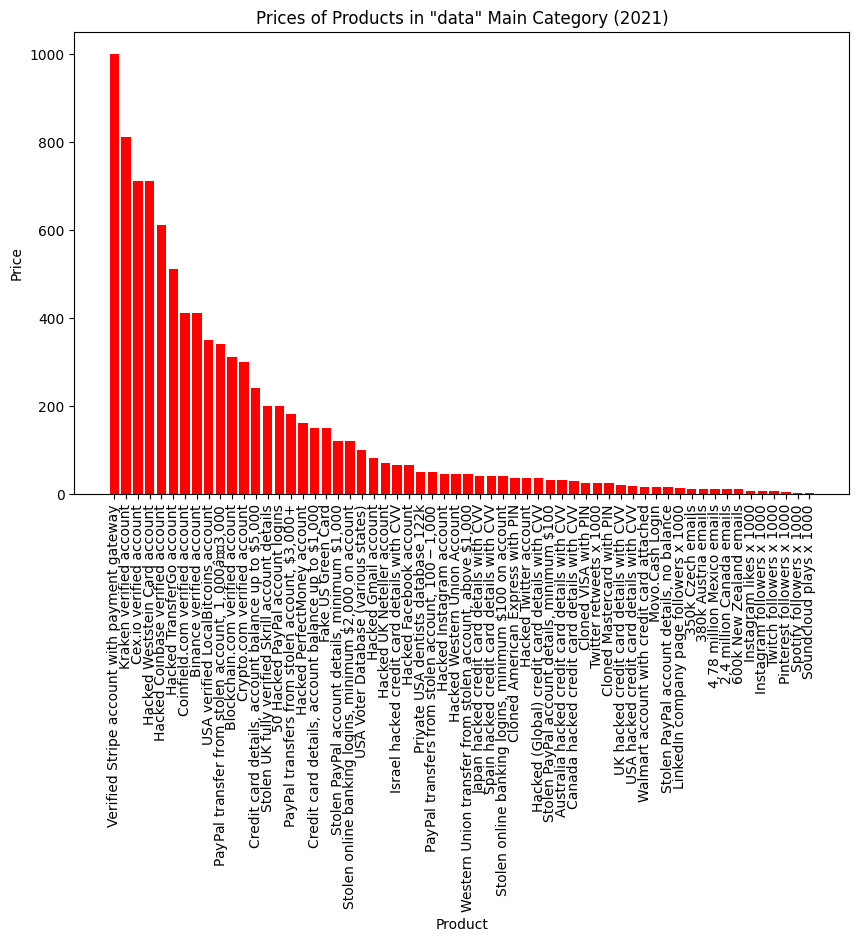

In [70]:
#'Prices of Products in "data" Main Category (2021)
# Sort the DataFrame by price in descending order
df_2021_sorted = df_2021_filtered.sort_values('price', ascending=False)
df_2021_filtered = df_2021_sorted[df_2021_sorted['category'] != 'Payment processing services']

plt.figure(figsize=(10, 6))
plt.bar(df_2021_sorted['product'], df_2021_sorted['price'], color='red')
plt.xlabel('Product')
plt.ylabel('Price')
plt.title('Prices of Products in "data" Main Category (2021)')
plt.xticks(rotation=90)
plt.show()

In [71]:
df_2022.head()

,main_category,category,product,price
0,data,Credit Card Data,"Credit card details, account balance up to 5,000",120
1,data,Credit Card Data,"Credit card details, account balance up to 1,000",80
2,data,Credit Card Data,"Stolen online banking logins, minimum â¨2,000...",65
3,data,Credit Card Data,Israel hacked credit card details with CVV,25
4,data,Credit Card Data,Hacked (Global) credit card details with CVV,15


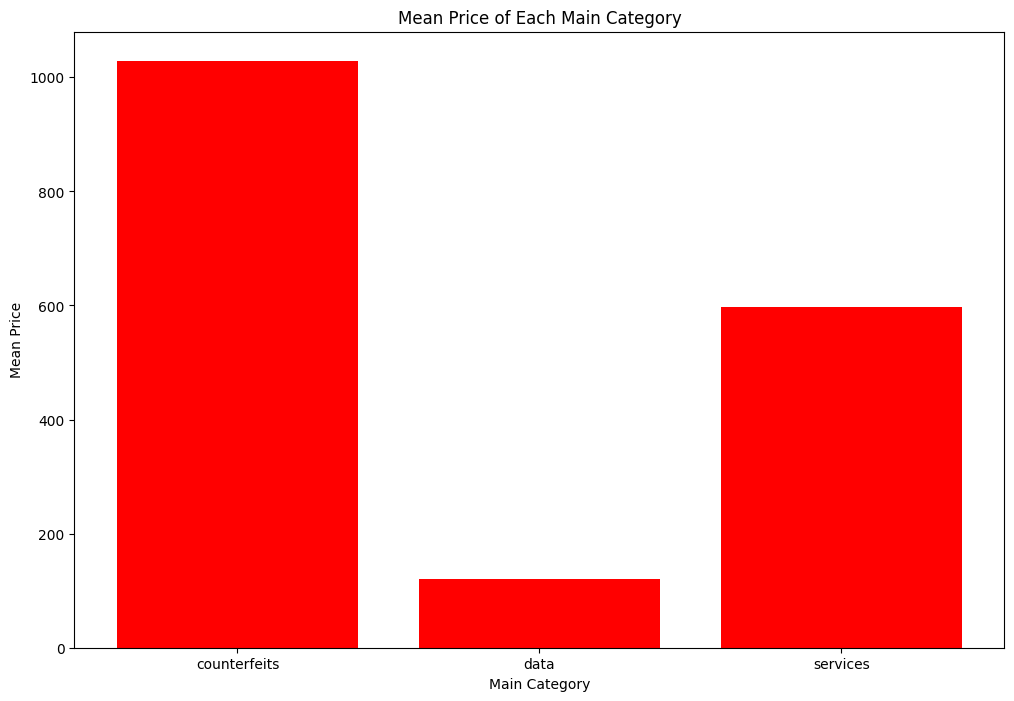

In [72]:
#The mean price of each main_category

#mean price for each main_category
mean_prices = df_2022.groupby('main_category')['price'].mean()


plt.figure(figsize=(12, 8))
plt.bar(mean_prices.index, mean_prices, color='red')
plt.xlabel('Main Category')
plt.ylabel('Mean Price')
plt.title('Mean Price of Each Main Category')
plt.show()

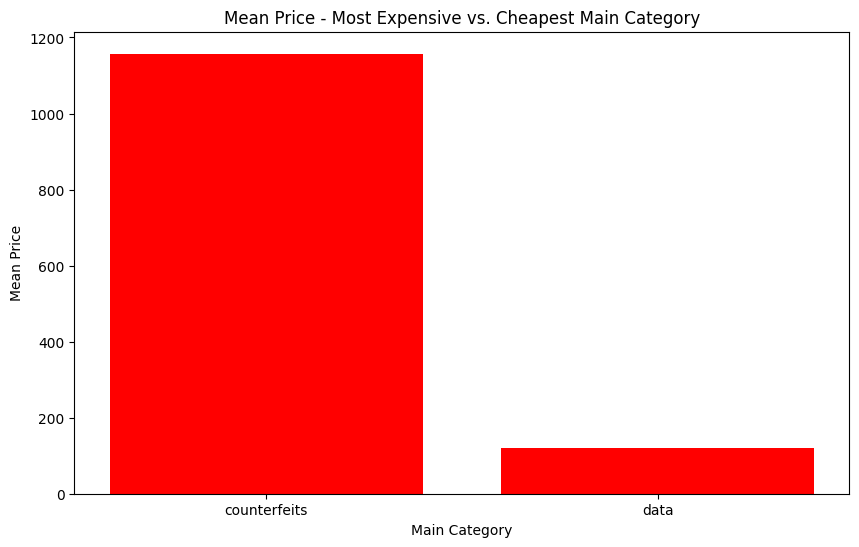

In [73]:
#The most expensive and the cheapest main_category

#the most expensive and cheapest main_categories
most_expensive = df_2022.groupby('main_category')['price'].max().idxmax()
cheapest = df_2022.groupby('main_category')['price'].min().idxmin()

plt.figure(figsize=(10, 6))
plt.bar([most_expensive, cheapest], [df_2022.loc[df_2021['main_category'] == most_expensive, 'price'].mean(), df_2022.loc[df_2022['main_category'] == cheapest, 'price'].mean()],  color='red')
plt.xlabel('Main Category')
plt.ylabel('Mean Price')
plt.title('Mean Price - Most Expensive vs. Cheapest Main Category')
plt.show()

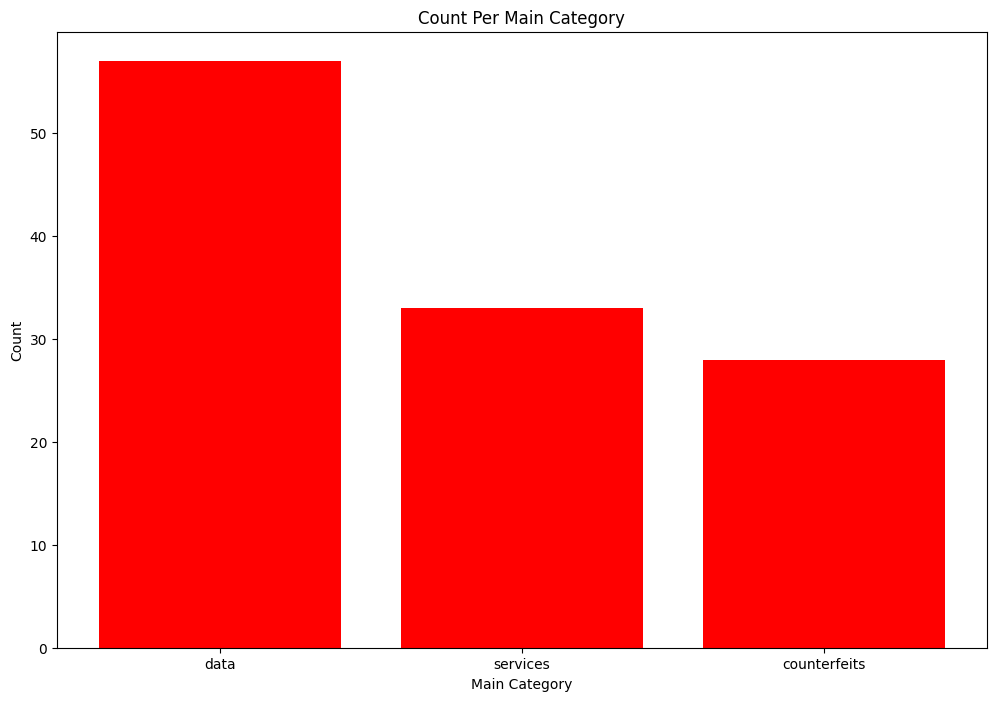

In [74]:
#Volume per main_category

#the count per main_category
category_counts = df_2022['main_category'].value_counts()


plt.figure(figsize=(12, 8))
plt.bar(category_counts.index, category_counts,  color='red')
plt.xlabel('Main Category')
plt.ylabel('Count')
plt.title('Count Per Main Category')
plt.show()

In [75]:
#Focus on data
df_2022_filtered = df_2022[df_2022['main_category'] == 'data']
df_2022_filtered

,main_category,category,product,price
0,data,Credit Card Data,"Credit card details, account balance up to 5,000",120
1,data,Credit Card Data,"Credit card details, account balance up to 1,000",80
2,data,Credit Card Data,"Stolen online banking logins, minimum â¨2,000...",65
3,data,Credit Card Data,Israel hacked credit card details with CVV,25
4,data,Credit Card Data,Hacked (Global) credit card details with CVV,15
5,data,Credit Card Data,Spain hacked credit card details with CVV,25
6,data,Credit Card Data,Cloned American Express with PIN,25
7,data,Credit Card Data,Canada hacked credit card details with CVV,18
8,data,Credit Card Data,Australia hacked credit card details w/ CVV,23
9,data,Credit Card Data,Cloned Mastercard with PIN,20


C:\Users\ploitploit\Downloads\darknet_project\darknet_project\venv_project\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
Font 'rm' does not have a glyph for '\x80' [U+80], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\x93' [U+93], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\x80' [U+80], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\x93' [U+93], substituting with a dummy symbol.


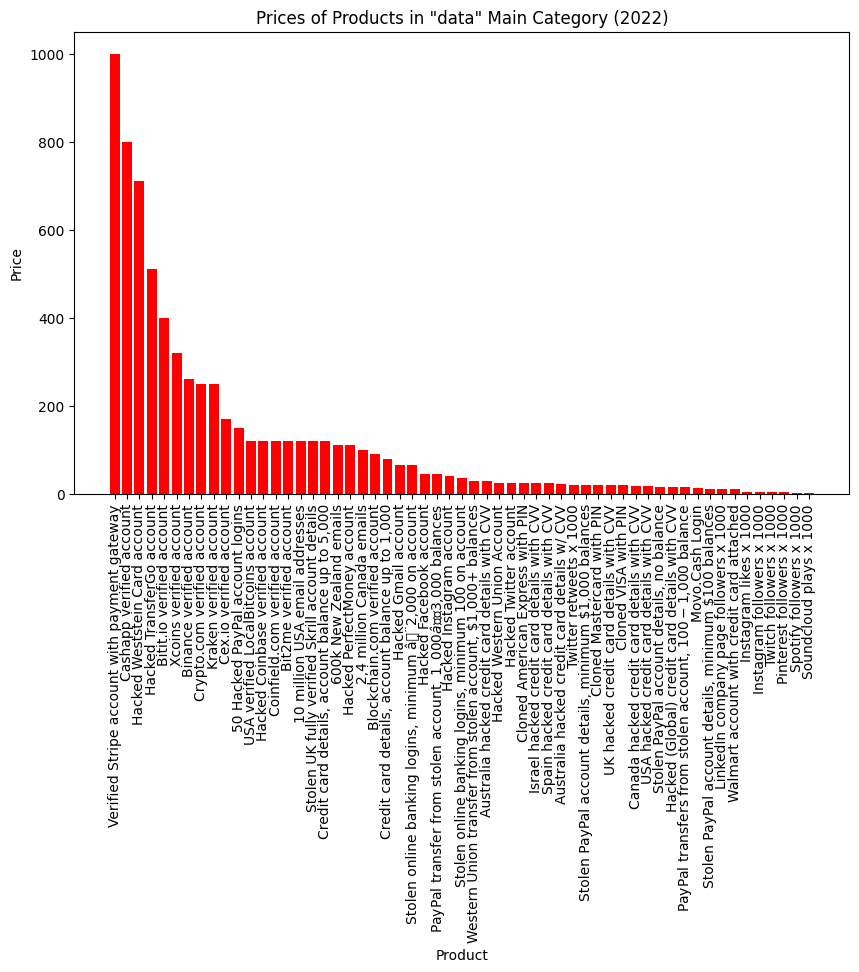

In [76]:
#'Prices of Products in "data" Main Category (2022)
# Sort the DataFrame by price in descending order
df_2022_sorted = df_2022_filtered.sort_values('price', ascending=False)
df_2022_filtered = df_2022_sorted[df_2022_sorted['category'] != 'Payment processing services']


plt.figure(figsize=(10, 6))
plt.bar(df_2022_sorted['product'], df_2022_sorted['price'], color='red')
plt.xlabel('Product')
plt.ylabel('Price')
plt.title('Prices of Products in "data" Main Category (2022)')
plt.xticks(rotation=90)
plt.show()

In [77]:
df_2023.head()

,main_category,category,product,price
0,data,Credit Card Data,Cloned Mastercard with PIN,15.0
1,data,Credit Card Data,Cloned American Express with PIN,35.0
2,data,Credit Card Data,Cloned VISA with PIN,25.0
3,data,Credit Card Data,"Credit card details, account balance up to $1000",12.0
4,data,Credit Card Data,"Credit card details, account balance up to $5000",20.0


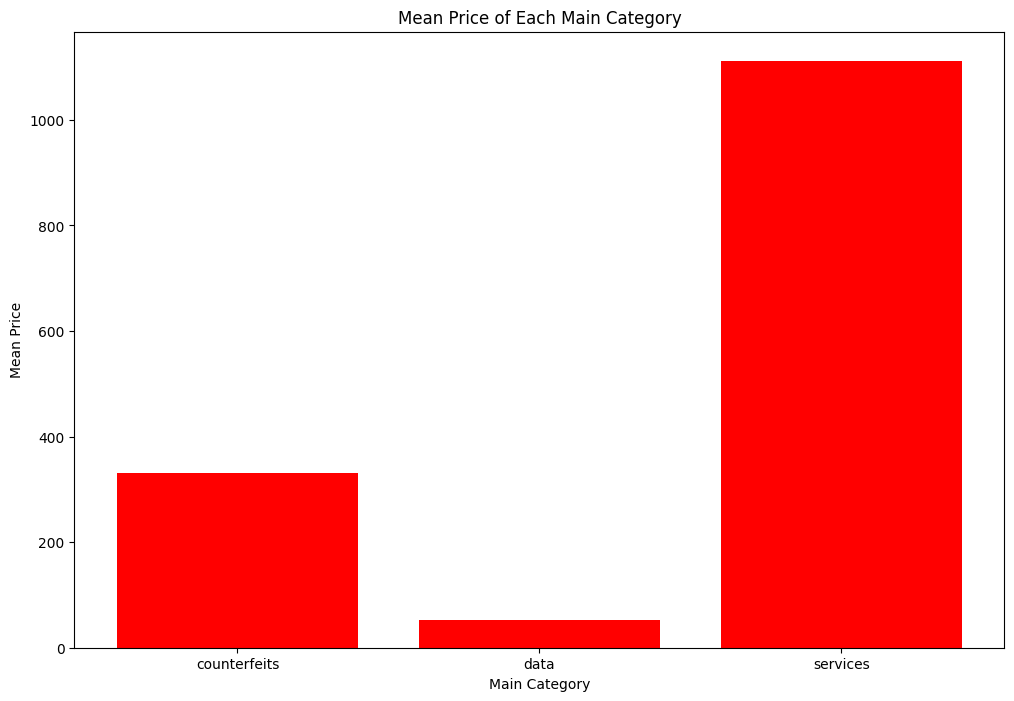

In [78]:
#The mean price of each main_category

#mean price for each main_category
mean_prices = df_2023.groupby('main_category')['price'].mean()


plt.figure(figsize=(12, 8))
plt.bar(mean_prices.index, mean_prices, color='red')
plt.xlabel('Main Category')
plt.ylabel('Mean Price')
plt.title('Mean Price of Each Main Category')
plt.show()

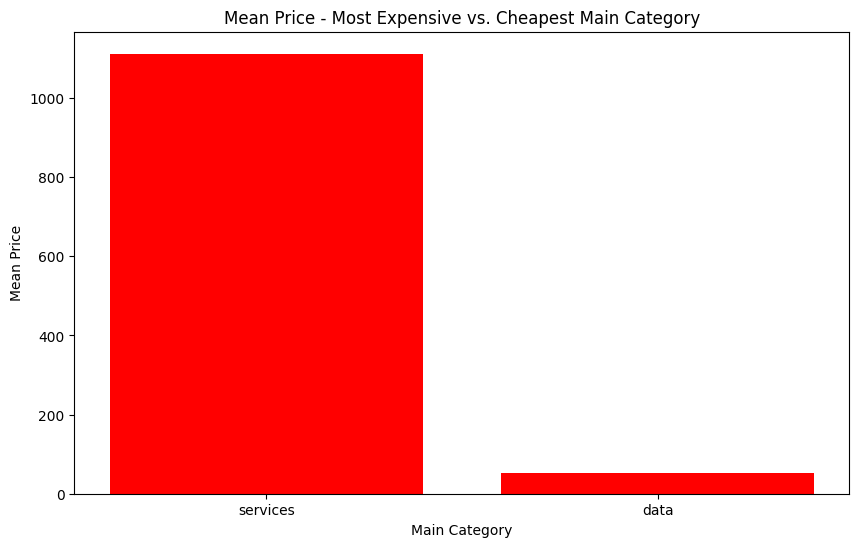

In [79]:
#The most expensive and the cheapest main_category

#the most expensive and cheapest main_categories
most_expensive = df_2023.groupby('main_category')['price'].max().idxmax()
cheapest = df_2023.groupby('main_category')['price'].min().idxmin()

plt.figure(figsize=(10, 6))
plt.bar([most_expensive, cheapest], [df_2023.loc[df_2023['main_category'] == most_expensive, 'price'].mean(), df_2023.loc[df_2023['main_category'] == cheapest, 'price'].mean()],  color='red')
plt.xlabel('Main Category')
plt.ylabel('Mean Price')
plt.title('Mean Price - Most Expensive vs. Cheapest Main Category')
plt.show()

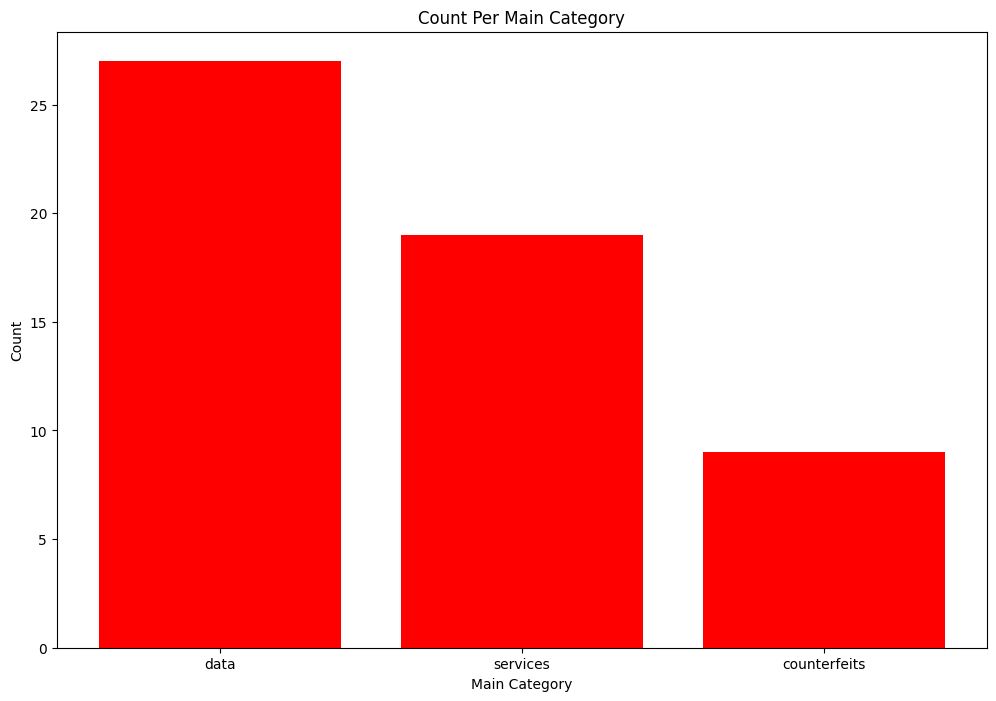

In [80]:
#Volume per main_category

#the count per main_category
category_counts = df_2023['main_category'].value_counts()


plt.figure(figsize=(12, 8))
plt.bar(category_counts.index, category_counts,  color='red')
plt.xlabel('Main Category')
plt.ylabel('Count')
plt.title('Count Per Main Category')
plt.show()

In [81]:
#Focus on data
df_2023_filtered = df_2023[df_2023['main_category'] == 'data']
df_2023_filtered

,main_category,category,product,price
0,data,Credit Card Data,Cloned Mastercard with PIN,15.00
1,data,Credit Card Data,Cloned American Express with PIN,35.00
2,data,Credit Card Data,Cloned VISA with PIN,25.00
3,data,Credit Card Data,"Credit card details, account balance up to $1000",12.00
4,data,Credit Card Data,"Credit card details, account balance up to $5000",20.00
5,data,Credit Card Data,"Stolen online banking logins, minimum $100 on ...",35.00
6,data,Credit Card Data,"Stolen online banking logins, minimum $2000 on...",65.00
7,data,Credit Card Data,Walmart account with credit card attached,10.00
8,data,Payment processing services,"Stolen PayPal account details, minimum $100",198.56
9,data,Payment processing services,"PayPal transfer from stolen account, $1000 â...",320.39


Font 'rm' does not have a glyph for '\x80' [U+80], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\x93' [U+93], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\x80' [U+80], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\x93' [U+93], substituting with a dummy symbol.


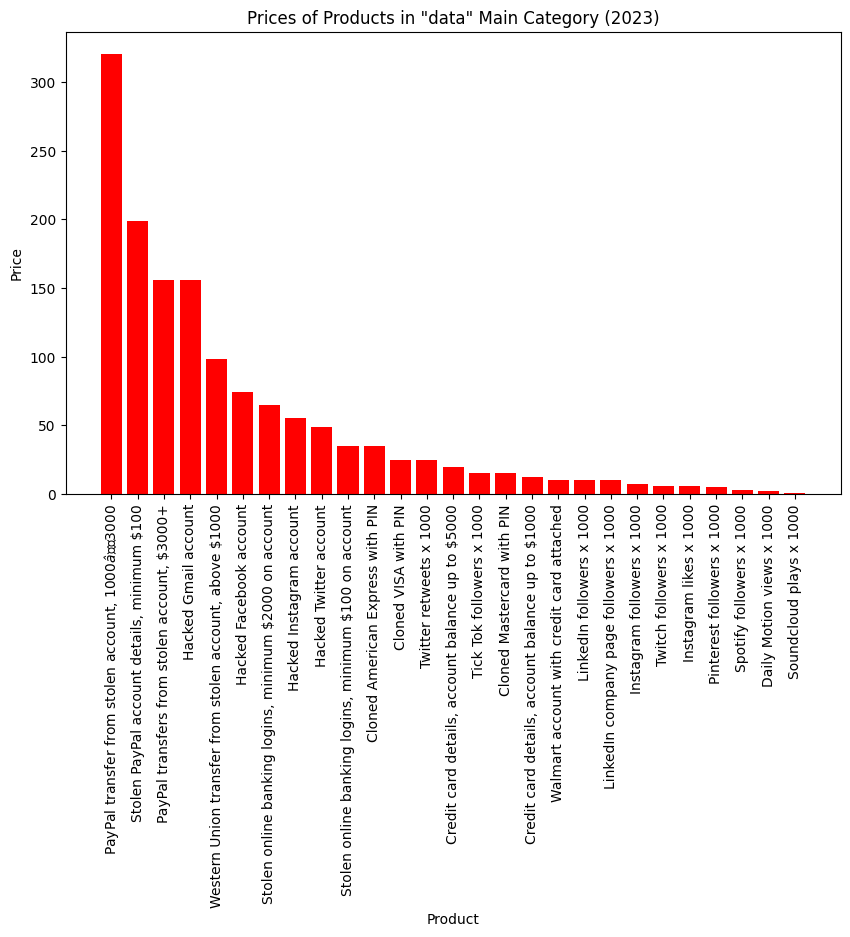

In [82]:
#'Prices of Products in "data" Main Category (2023)
# Sort the DataFrame by price in descending order
df_2023_sorted = df_2023_filtered.sort_values('price', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(df_2023_sorted['product'], df_2023_sorted['price'], color='red')
plt.xlabel('Product')
plt.ylabel('Price')
plt.title('Prices of Products in "data" Main Category (2023)')
plt.xticks(rotation=90)
plt.show()

In [83]:
###########################################################

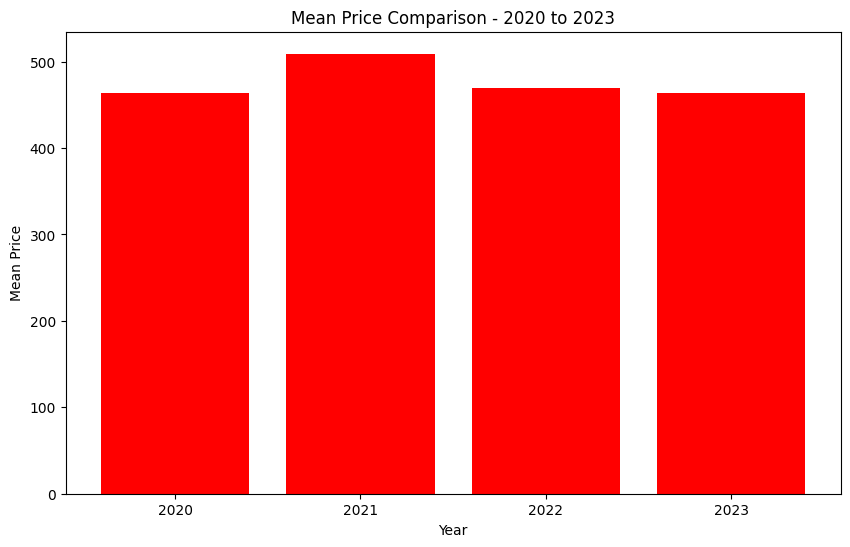

In [84]:
# Calculate the mean price for each DataFrame
mean_prices_2020 = df_2020['price'].mean()
mean_prices_2021 = df_2021['price'].mean()
mean_prices_2022 = df_2022['price'].mean()
mean_prices_2023 = df_2023['price'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(['2020', '2021', '2022', '2023'], [mean_prices_2020, mean_prices_2021, mean_prices_2022, mean_prices_2023],  color='red')

# Set the axis labels and plot title
plt.xlabel('Year')
plt.ylabel('Mean Price')
plt.title('Mean Price Comparison - 2020 to 2023')

# Show the plot
plt.show()